<a href="https://colab.research.google.com/github/simonc999/Machine-learning-project/blob/main/relation_EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The goal of machine learning is to create automatic systems that behave as if they possess human-like abilities. These systems tackle multivariate problems, respond to complex stimuli, apply heuristic and non-mechanical rules, interact with the environment, and learn from experimental observations. A machine trained in this manner will be capable of automatically classifying new cases never seen before, drawing from its knowledge, much like a human would. There are numerous families and types of learning, and in this course, we have focused on the branch of Empirical Learning. Empirical learning refers to a learning method that starts from a set of experimental observations, often referred to as a **dataset**, and constructs a classification rule based on them. The outcome of this learning process is a classifier, a set of decision rules that determine whether an element belongs to one class or another.

In the case I will delve into in this report, the classification under consideration is based on the presence or absence of diabetes.
For this project the **Pima Indians Diabetes Database** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download was used.


# The Condition


Diabetes mellitus is a chronic and multifactorial metabolic disorder that occurs when blood sugar levels are too high. There are four main types of diabetes:


*   **Type 1 Diabetes** Also known as juvenile diabetes, it occurs when the immune system attacks the pancreatic beta cells that produce insulin. It is more common during adolescence and can lead to kidney damage, pregnancy complications, dermatological issues, as well as blood circulation problems.

*   **Type 2 Diabetes** The body either doesn't produce enough insulin or doesn't respond properly to it. It can be managed with insulin therapy, medications, diet, and exercise, but it can lead to kidney, nerve, and eye problems, as well as heart disease and stroke. Diagnosis involves various tests such as the A1C test, FPG test, RPG test, oral glucose tolerance test, glucose challenge test, fasting blood sugar test, and random blood sugar test.

* **Gestational Diabetes** It occurs during pregnancy and can lead to complications like fluctuating blood pressure, breathing difficulties, birth weight complexities, preterm delivery, and future diabetes. Treatment includes diet, insulin injections, exercise, and blood sugar monitoring. While the chances of developing diabetes post-pregnancy are reduced in most cases, if not adequately managed, it can manifest in the future.

* **Prediabetes ** This occurs when glucose levels are elevated but not high enough to be classified as type 2 diabetes. It can increase the risk of diabetes and heart disease. Conditions associated with prediabetes include high blood pressure, low HDL levels, high blood sugar levels, a large waist circumference, and high triglycerides. These conditions can lead to metabolic syndrome.

# The Data Set

The data set considered for this report is the ***Pima Indians Diabetes Database*** (Original owners: National Institute of Diabetes and Digestive and Kidney Diseases donated by Vincent Sigillito (vgs@aplcen.apl.jhu.edu) received on 09/05/1990) containing data from **768** female patients over the age of twenty-one. The attributes recorded in this database are:

*   1 Number of times pregnant [#] [#]
*   2 2 Plasma glucose concentration after 2 hours from consuming a glucose bolus [$\frac{mg}{dl}$]. The concentration after two hours is considered normal if it's less than 155 $mg/dl$.
*   3 Diastolic blood pressure [$mmHg$]
*   4 Triceps skinfold thickness [$mm$]
*   5 Serum insulin after 2 hours from consuming a glucose bolus [$\frac{\mu U}{ml}$ ]
*   6 Body mass index [$\frac{weight [kg]}{height^2 [m^2] }$ ]
*   7 Diabetes pedigree function
*   8 Age [years]

In addition to the attributes, there's the classification column which takes binary values:



> 1 in case the recruited person has diabetes

> 0 in case they don't



**The analyzed dataset is slightly imbalanced, with a more significant presence of healthy patients compared to those with the condition.**

# Problem Definition and Data Analysis Objectives
    
The goal of this analysis is to use the available data to create a predictive model that can distinguish between the two possible outcomes: **diabetes or non-diabetes**.


If the AI-based application is used for clinical decision-making, such as diabetes diagnosis, it's important that it can provide explanations for its predictions. Explainability is crucial when it comes to artificial intelligence applications in the medical context. Physicians and healthcare professionals must be able to understand the reasons behind predictions to make informed decisions and treat patients appropriately.

Interpreting predictions can be achieved through model explanation techniques, such as feature importance, which show **which attributes contributed most to the prediction ** (blood sugar levels, body mass index, and age were the most influential factors in classifying a patient as diabetic or non-diabetic).

Furthermore, providing information about the probabilities associated with classifications can be helpful in assessing the confidence in the model's predictions. Probabilities can be presented alongside predictions, indicating the estimated likelihood that a patient has diabetes or not. This can enable doctors to make more informed decisions, considering both the model's predictions and their own clinical knowledge and experience.

It's important to note that explainability and providing probability information are desirable aspects, but they might need to be balanced with the model's complexity and specific application needs. In some cases, simpler and interpretable models, such as logistic regression, might be preferred if explainability is the primary goal.

# Data Understanding
We now proceed to the data understanding phase, where we analyze the variables to determine their nature. **In our data set, mostly continuous variables are present, except for variable number 1, discretized as integers (number of pregnancies), and variable 8, representing an age, also discretized as integers.**
The first step for an overview of the available data is to perform general statistics on the entire data set.

In [ ]:
# @title Importing dataset { display-mode: "form" }
import pandas as pd

# Import data from GitHub:
originalDATASET = pd.read_csv('https://raw.githubusercontent.com/simonc999/Machine-learning-project/main/pima-indians-diabetes.csv')

# Print names of the features:
print("------- Headers -------")
for col in originalDATASET.columns:
    print(col)

# Rename the features:
originalDATASET.rename(columns={'1. Number of times pregnant': 'F1', '2. Plasma glucose concentration': 'F2', '3. Diastolic blood pressure (mm Hg)': 'F3', '4. Triceps skin fold thickness (mm)': 'F4', '5. 2-Hour serum insulin (mu U/ml)': 'F5', '6. Body mass index (weight in kg/(height in m)^2)': 'F6', '7. Diabetes pedigree function': 'F7', '8. Age (years)': 'F8', '9. Class variable (0 or 1)': 'C'}, inplace=True)

# Print stats:
print("------- Stats -------")
print(round(originalDATASET.iloc[:,0:8].describe(),3))

------- Headers -------
1. Number of times pregnant
2. Plasma glucose concentration
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)
------- Stats -------
            F1       F2       F3       F4       F5       F6       F7       F8
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000
max     17.000  199.000  122.000   99.000 

Observing minimum values of 0 in features 2, 3, 4, 5, and 6, we can hypothesize that we might be facing missing data in our data set.

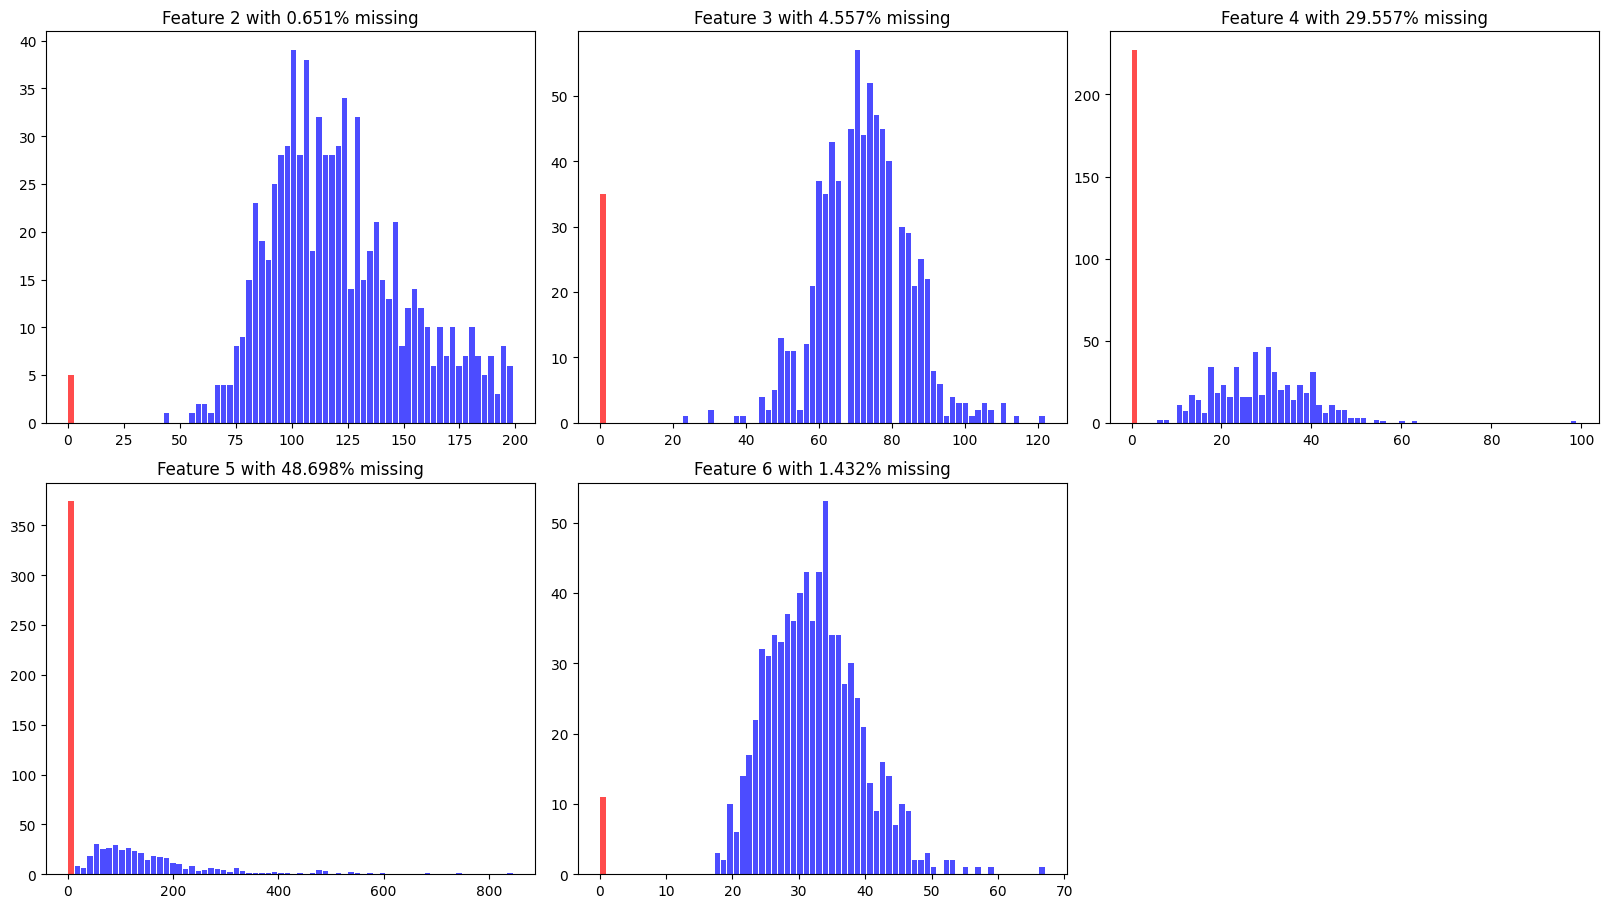

In [ ]:
# @title Detecting missing values { display-mode: "form" }
import numpy as np
import matplotlib.pyplot as plt
originalDATASET = pd.read_csv('https://raw.githubusercontent.com/simonc999/Machine-learning-project/main/pima-indians-diabetes.csv')
originalDATASET.rename(columns={'1. Number of times pregnant': 'F1', '2. Plasma glucose concentration': 'F2', '3. Diastolic blood pressure (mm Hg)': 'F3', '4. Triceps skin fold thickness (mm)': 'F4', '5. 2-Hour serum insulin (mu U/ml)': 'F5', '6. Body mass index (weight in kg/(height in m)^2)': 'F6', '7. Diabetes pedigree function': 'F7', '8. Age (years)': 'F8', '9. Class variable (0 or 1)': 'C'}, inplace=True)

# Printing plots:
fig, axs = plt.subplots(2, 3,figsize=(16,9))
i=1
for ax in fig.get_axes():
    data = originalDATASET.iloc[:,i]
    N, bins, patches = ax.hist(x=data, bins=70, color='b',alpha=0.7, rwidth=0.85)
    percentuale = (len(data[data == 0]) / len(data)) * 100
    ax.set_title('Feature '+str(i+1) + ' with ' + str(round(percentuale,3)) + '% missing')
    patches[0].set_facecolor('r')
    i+=1
fig.delaxes(axs[1,2])

# Adjust padding:
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)



For some variables like glucose concentration, diastolic blood pressure, and body mass index, having records equal to 0 does indeed seem unusual.

To address missing data, you can remove patients with missing data (not preferable), or alternatively, you can use imputing strategies, replacing with the median to avoid bias from outliers, or you can employ techniques like data multiplication for missing data.

Let's remove the missing values from the features by replacing them with np.nan and recalculate the statistics without considering the missing data.

In [ ]:
# @title Fixing missing values with np.nan { display-mode: "form" }
originalDATASET_nan = originalDATASET
i=0
for i in range(1, 6):
  originalDATASET_nan.iloc[originalDATASET_nan.iloc[:,i]==0,i]=np.nan;


# Print stats:
print("------- Stats -------")
print(round(originalDATASET_nan.iloc[:,0:8].describe(),3))


------- Stats -------
            F1       F2       F3       F4       F5       F6       F7       F8
count  768.000  763.000  733.000  541.000  394.000  757.000  768.000  768.000
mean     3.845  121.687   72.405   29.153  155.548   32.457    0.472   33.241
std      3.370   30.536   12.382   10.477  118.776    6.925    0.331   11.760
min      0.000   44.000   24.000    7.000   14.000   18.200    0.078   21.000
25%      1.000   99.000   64.000   22.000   76.250   27.500    0.244   24.000
50%      3.000  117.000   72.000   29.000  125.000   32.300    0.372   29.000
75%      6.000  141.000   80.000   36.000  190.000   36.600    0.626   41.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000


I create histograms for each feature divided by class:

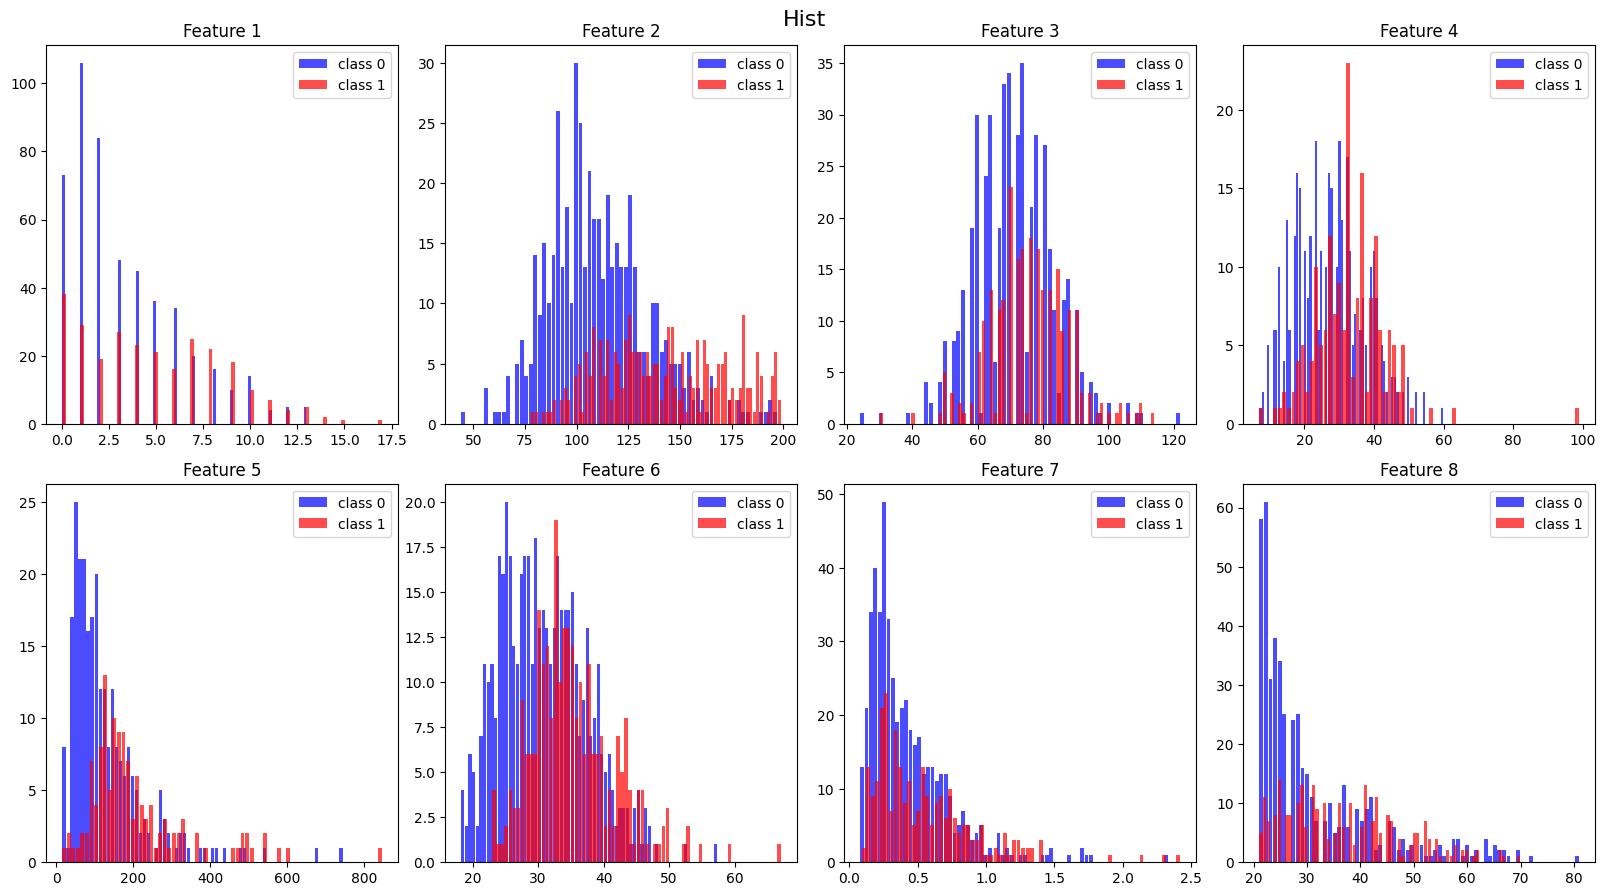

In [ ]:
# @title Hists { display-mode: "form" }
# Printing plots:
fig, axs = plt.subplots(2, 4,figsize=(16,9))
fig.suptitle("Hist", fontsize=16)

i=0
class0arrayIndexes = np.array(originalDATASET_nan.iloc[:,-1]==0)
class1arrayIndexes = np.array(originalDATASET_nan.iloc[:,-1]==1)

for ax in fig.get_axes():
    ax.hist(x=originalDATASET_nan.iloc[class0arrayIndexes,i], bins=70, color='b',alpha=0.7, rwidth=0.85, label='class 0')
    ax.hist(x=originalDATASET_nan.iloc[class1arrayIndexes,i], bins=70, color='r',alpha=0.7, rwidth=0.85, label='class 1')
    ax.set_title('Feature '+str(i+1))
    ax.legend(loc='upper right')
    i+=1

# Adjust padding:
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

I create box-plots for each feature divided by class:

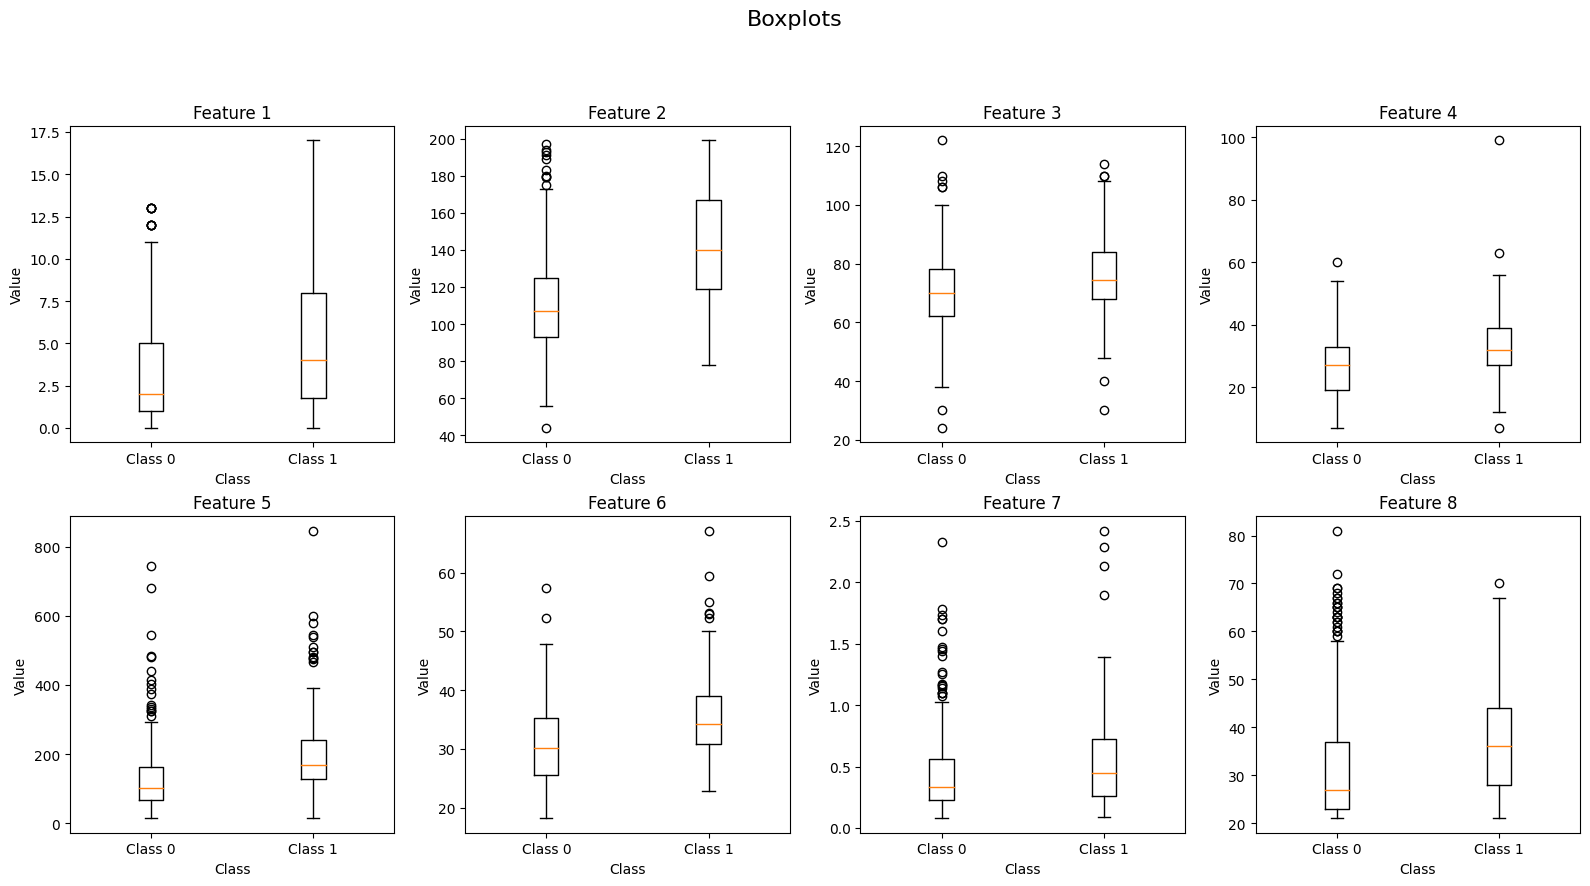

In [ ]:
# @title Boxplots { display-mode: "form" }
data = originalDATASET_nan
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(16,9))
fig.suptitle("Boxplots", fontsize=16)

for feature_idx, ax in enumerate(axes.flatten()):
    feature_data_class_0 = originalDATASET_nan.iloc[class0arrayIndexes, feature_idx]
    feature_data_class_1 = originalDATASET_nan.iloc[class1arrayIndexes, feature_idx]

    feature_data_class_0 = feature_data_class_0[~np.isnan(feature_data_class_0)]
    feature_data_class_1 = feature_data_class_1[~np.isnan(feature_data_class_1)]


    boxplot_data = [feature_data_class_0, feature_data_class_1]
    labels = ['Class 0', 'Class 1']

    ax.boxplot(boxplot_data, labels=labels)
    ax.set_title(f'Feature {feature_idx + 1}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Class')

plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()

# Analysis of Feature Correlation
We proceed with a correlation analysis among the features in our dataset. To choose which correlation index to use, after normalizing the variables beforehand, we perform a k-s test to assess whether the data follows a normal distribution.



In [ ]:
# @title Preliminar test for choosing the heatmap coefficient { display-mode: "form" }
from scipy import stats
for column in originalDATASET_nan.iloc[:,:-1]:
  data = (originalDATASET_nan[column] - originalDATASET_nan[column].mean())/originalDATASET_nan[column].std()
  data = data[~np.isnan(data)]
  out = stats.ks_1samp(data, stats.norm.cdf)
  display("---------- KS test for " + column + " ----------")
  display(out)
  print("\n")

'---------- KS test for F1 ----------'

KstestResult(statistic=0.1624306558920357, pvalue=3.5823222943496554e-18, statistic_location=-0.5475617566952985, statistic_sign=1)

'---------- KS test for F2 ----------'

KstestResult(statistic=0.07269539595097779, pvalue=0.0005950512923687773, statistic_location=-0.3172280796532292, statistic_sign=1)

'---------- KS test for F3 ----------'

KstestResult(statistic=0.04601775915051909, pvalue=0.08693456447268089, statistic_location=0.4518449635709834, statistic_sign=1)

'---------- KS test for F4 ----------'

KstestResult(statistic=0.04621907662084779, pvalue=0.19203517539152626, statistic_location=0.3671458317686412, statistic_sign=1)

'---------- KS test for F5 ----------'

KstestResult(statistic=0.144643337153178, pvalue=1.1732785752923503e-07, statistic_location=0.3237339490347476, statistic_sign=1)

'---------- KS test for F6 ----------'

KstestResult(statistic=0.035050628654064275, pvalue=0.3030944501268382, statistic_location=0.30939204874550846, statistic_sign=1)

'---------- KS test for F7 ----------'

KstestResult(statistic=0.12396702389194851, pvalue=9.575253545289412e-11, statistic_location=-1.0589979475505418, statistic_sign=-1)

'---------- KS test for F8 ----------'

KstestResult(statistic=0.15643039387783636, pvalue=7.023775237757875e-17, statistic_location=-0.36061240818239215, statistic_sign=1)

The results indicate that for features 1, 2, 5, 7, and 8, the null hypothesis is rejected, and therefore, we cannot make assumptions of normality. As we cannot use the Pearson correlation coefficient, we employ Kendall's tau.

<Axes: >

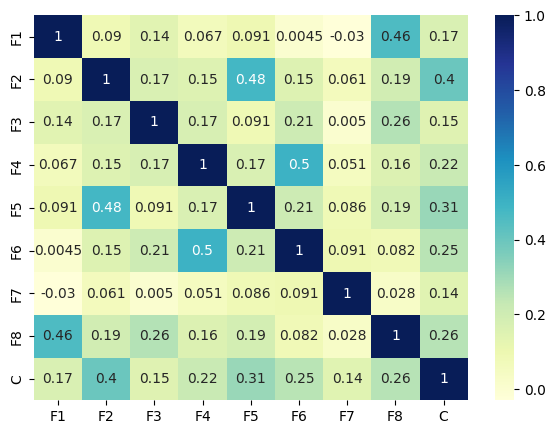

In [ ]:
# @title Heatmap { display-mode: "form" }
from pylab import rcParams
import seaborn as sb


rcParams['figure.figsize'] = 7,5
sb.heatmap(originalDATASET_nan.corr(method='kendall'),
           xticklabels=originalDATASET_nan.columns.values,
           yticklabels=originalDATASET_nan.columns.values,
           cmap="YlGnBu",
          annot=True )

Due to a substantial lack of data for feature number 5, concerning serum insulin concentration, we proceed to remove the feature as it would overly bias our analysis, following imputing operations described later, leading to overfitting.

In [ ]:
# @title Dropping feature 5 { display-mode: "form" }
DATASET = originalDATASET_nan.drop("F5" ,axis= 1)
print(DATASET)

     F1     F2    F3    F4    F6     F7  F8  C
0     6  148.0  72.0  35.0  33.6  0.627  50  1
1     1   85.0  66.0  29.0  26.6  0.351  31  0
2     8  183.0  64.0   NaN  23.3  0.672  32  1
3     1   89.0  66.0  23.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  43.1  2.288  33  1
..   ..    ...   ...   ...   ...    ...  .. ..
763  10  101.0  76.0  48.0  32.9  0.171  63  0
764   2  122.0  70.0  27.0  36.8  0.340  27  0
765   5  121.0  72.0  23.0  26.2  0.245  30  0
766   1  126.0  60.0   NaN  30.1  0.349  47  1
767   1   93.0  70.0  31.0  30.4  0.315  23  0

[768 rows x 8 columns]


# Preparazione dei dati e preprocessing


## 1 Outliers



We will now proceed to analyze the outliers in our dataset. During the preparation of this analysis, we have learned about four main methods for handling outliers:

* One-Class SVM
* Covariance estimation
* Local outlier factor
* Isolation forest

These methods heavily rely on data, and for our dataset, we choose the third one, which is more preferable. It is based on the validation of density concerning K nearest neighbors, where K is the hyperparameter to be set. Since the library doesn't handle NaN values, we will use the Orange software to determine the outliers.

We will use the Outliers widget in Orange, selecting the third method and keeping the value of **K** as 30. In our case, we will use the Manhattan distance, which is preferable for large dataset sizes, setting the outlier search percentage (Contamination) to 1%. We obtain a dataset of **760** data points, finding 8 outliers. We will manually remove these outliers as follows.


In [ ]:
# @title Outliers search (manually) { display-mode: "form" }
print("---------- Outliers ----------")
print(DATASET.iloc[[18,62,106,125,177,537,579,597],:])
print("---------- New dataset ----------")
DATASET_withoutOutliers = DATASET.drop([18,62,106,125,177,537,579,597],axis= 0)
print(DATASET_withoutOutliers)

---------- Outliers ----------
     F1     F2     F3    F4    F6     F7  F8  C
18    1  103.0   30.0  38.0  43.3  0.183  33  0
62    5   44.0   62.0   NaN  25.0  0.587  36  0
106   1   96.0  122.0   NaN  22.4  0.207  27  0
125   1   88.0   30.0  42.0  55.0  0.496  26  1
177   0  129.0  110.0  46.0  67.1  0.319  26  1
537   0   57.0   60.0   NaN  21.7  0.735  67  0
579   2  197.0   70.0  99.0  34.7  0.575  62  1
597   1   89.0   24.0  19.0  27.8  0.559  21  0
---------- New dataset ----------
     F1     F2    F3    F4    F6     F7  F8  C
0     6  148.0  72.0  35.0  33.6  0.627  50  1
1     1   85.0  66.0  29.0  26.6  0.351  31  0
2     8  183.0  64.0   NaN  23.3  0.672  32  1
3     1   89.0  66.0  23.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  43.1  2.288  33  1
..   ..    ...   ...   ...   ...    ...  .. ..
763  10  101.0  76.0  48.0  32.9  0.171  63  0
764   2  122.0  70.0  27.0  36.8  0.340  27  0
765   5  121.0  72.0  23.0  26.2  0.245  30  0
766   1  126.0  60.0   NaN  30.1 

## 2 Dividing the Dataset into Training Set and Test Set

Before performing any preprocessing operations, let's divide the dataset into training and test sets. We'll use a stratified split by class with proportions of .7 and .3 for training and test sets, respectively:

In [ ]:
# @title Train/Test split { display-mode: "form" }
from sklearn.model_selection import train_test_split
y = DATASET_withoutOutliers.iloc[:,-1]
X_train, X_TEST, y_train, y_TEST = train_test_split(DATASET_withoutOutliers,y,stratify=y,test_size=.3,random_state=0)
print("---------- Test-set ----------")

print(X_TEST)

---------- Test-set ----------
     F1     F2    F3    F4    F6     F7  F8  C
434   1   90.0  68.0   8.0  24.5  1.138  36  0
189   5  139.0  80.0  35.0  31.6  0.361  25  1
604   4  183.0   NaN   NaN  28.4  0.212  36  1
237   0  179.0  90.0  27.0  44.1  0.686  23  1
293   1  128.0  48.0  45.0  40.5  0.613  24  1
..   ..    ...   ...   ...   ...    ...  .. ..
499   6  154.0  74.0  32.0  29.3  0.839  39  0
211   0  147.0  85.0  54.0  42.8  0.375  24  0
8     2  197.0  70.0  45.0  30.5  0.158  53  1
56    7  187.0  68.0  39.0  37.7  0.254  41  1
717  10   94.0  72.0  18.0  23.1  0.595  56  0

[228 rows x 8 columns]


## 3 Imputing the previously introduced missing data.

We proceed to the imputing operation, which allows us to replace values for missing data. Throughout the course, we've learned about two main imputing strategies that enable us to substitute missing observations: considering the entire dataset without accounting for the outcome (UNSUPERVISED) or also taking the outcome into account (SUPERVISED). It would be a mistake to perform supervised imputing on the entire dataset, as we risk biasing the results and overfitting.

Therefore, we have 3 possible imputing strategies:

* **Median replacement-based imputing for missing values.**
This univariate strategy involves calculating the median feature by feature and replacing missing data (NaN) with it.

* **Iterative imputing.** Alternatively, we consider imputing based on an iterative model from the sklearn library in Python. This model estimates missing attribute values, considering each feature in relation to the others iteratively. The data is inputted feature by feature, considering the contribution of previously estimated values to estimate those of the next feature.

* **K-nearest neighbors.** Another popular technique for imputation is using a K-nearest neighbor model. A new sample is imputed by finding samples in the training set that are "closest" to it and calculating the mean of these nearby points to insert the value. Two samples are close if their available features are similar.

Let's consider the last strategy for the training set. To prevent overfitting-related operations, we also perform imputing on the test set based on the information obtained from imputing the training set.

In [ ]:
# @title KNN imputing { display-mode: "form" }
from sklearn.impute import KNNImputer

medians = X_train.median(skipna=True)

imputer=KNNImputer(n_neighbors=5,weights='uniform',metric='nan_euclidean')
print("---------- Train-set before KNN-imputing ----------")
print(X_train)
imputer.fit(X_train)
Xtrans = imputer.transform(X_train)

X_train_IMPUTED = pd.DataFrame(Xtrans, columns=['F1','F2','F3','F4','F6','F7','F8','C'])

print("---------- Train-set after KNN-imputing ----------")
print(X_train_IMPUTED)

print("---------- Test-set before KNN-imputing ----------")
print(X_TEST)

X_TEST = imputer.transform(X_TEST)
X_TEST = pd.DataFrame(X_TEST, columns=['F1','F2','F3','F4','F6','F7','F8','C'])

print("---------- Test-set after KNN-imputing ----------")
print(X_TEST)

---------- Train-set before KNN-imputing ----------
     F1     F2    F3    F4    F6     F7  F8  C
138   0  129.0  80.0   NaN  31.2  0.703  29  0
224   1  100.0  66.0  15.0  23.6  0.666  26  0
392   1  131.0  64.0  14.0  23.7  0.389  21  0
484   0  145.0   NaN   NaN  44.2  0.630  31  1
72   13  126.0  90.0   NaN  43.4  0.583  42  1
..   ..    ...   ...   ...   ...    ...  .. ..
271   2  108.0  62.0  32.0  25.2  0.128  21  0
739   1  102.0  74.0   NaN  39.5  0.293  42  1
326   1  122.0  64.0  32.0  35.1  0.692  30  1
544   1   88.0  78.0  29.0  32.0  0.365  29  0
438   1   97.0  70.0  15.0  18.2  0.147  21  0

[532 rows x 8 columns]
---------- Train-set after KNN-imputing ----------
       F1     F2    F3    F4    F6     F7    F8    C
0     0.0  129.0  80.0  26.2  31.2  0.703  29.0  0.0
1     1.0  100.0  66.0  15.0  23.6  0.666  26.0  0.0
2     1.0  131.0  64.0  14.0  23.7  0.389  21.0  0.0
3     0.0  145.0  72.4  35.2  44.2  0.630  31.0  1.0
4    13.0  126.0  90.0  28.8  43.4  0.583  4

## 4 Training-set normalization


Let's proceed with normalization using the MinMaxScaler() method, which is preferable to standardization given that we have features that don't follow a normal distribution.

In [ ]:
# @title MinMaxScaler normalization { display-mode: "form" }
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X_train_IMPUTED)
X_train_NORM = pd.DataFrame(d, columns=X_train_IMPUTED.columns)
print("---------- Train-set after MinMaxScaler-normalization ----------")
print(X_train_NORM)


---------- Train-set after MinMaxScaler-normalization ----------
           F1        F2        F3        F4        F6        F7        F8    C
0    0.000000  0.510490  0.552632  0.342857  0.315534  0.264983  0.133333  0.0
1    0.058824  0.307692  0.368421  0.142857  0.131068  0.249144  0.083333  0.0
2    0.058824  0.524476  0.342105  0.125000  0.133495  0.130565  0.000000  0.0
3    0.000000  0.622378  0.452632  0.503571  0.631068  0.233733  0.166667  1.0
4    0.764706  0.489510  0.684211  0.389286  0.611650  0.213613  0.350000  1.0
..        ...       ...       ...       ...       ...       ...       ...  ...
527  0.117647  0.363636  0.315789  0.446429  0.169903  0.018836  0.000000  0.0
528  0.058824  0.321678  0.473684  0.482143  0.516990  0.089469  0.350000  1.0
529  0.058824  0.461538  0.342105  0.446429  0.410194  0.260274  0.150000  1.0
530  0.058824  0.223776  0.526316  0.392857  0.334951  0.120291  0.133333  0.0
531  0.058824  0.286713  0.421053  0.142857  0.000000  0.026969  0

## Considerations after Preprocessing (Introduction to Oversampling Operations):

In the obtained training set, we have the same class distribution percentages as the original dataset. Analyzing the results, we find ourselves in a critical scenario: datasets with a 60-40% split might not require balancing operations, as they may not significantly alter the results. However, for more imbalanced percentages (e.g., 70-30%), balancing is advisable. For this reason, from this point in the analysis onward, we will consider implementing three strategies:

* **Maintaining the Original Training Set:** We will keep the original training set without any modifications.

* **Performing Oversampling for Class Balancing:** We will apply oversampling techniques to balance the two classes.

* **Conducting Data Augmentation:** we will explore data augmentation methods to address the class imbalance.


# Oversampling

To balance the data, we will use the SMOTE (Synthetic Minority Over-sampling Technique) algorithm, employing the imbalanced-learn Python library to repopulate the training set. This will result in obtaining 694 records evenly balanced between the two classes.

The SMOTE algorithm offers an oversampling approach where the minority class is oversampled by creating estimated examples instead of replicating existing ones. This approach prevents generating dependent data. Additional training data is created by operating in the feature space rather than the value space. The minority class is oversampled by taking each record belonging to the minority class and introducing estimated examples along the segments that connect the k nearest neighbors of the minority class.

However, for feature 1 and 8, we need to round to the nearest similar values that were previously normalized. This is because these features are not continuous variables, and the algorithm would extract any values, causing a loss of meaning in the resulting variable.

In [ ]:
# @title SMOTE Oversampling { display-mode: "form" }
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN

seed = 40;
k=4;
data = X_train_NORM
X, y = data.iloc[:, [0, 1, 2, 3, 4, 5, 6]], data.iloc[:, 7]

percentage_of_zeros = np.sum(np.array(y) == 0) / len(np.array(y)) * 100
percentage_of_ones = np.sum(np.array(y) == 1) / len(np.array(y)) * 100
print("---------- % before SMOTE-oversampling ----------")
print(f"Percentage of 0s before DataAugmentation: {percentage_of_zeros:.2f}%")
print(f"Percentage of 1s before DataAugmentation: {percentage_of_ones:.2f}%")

oversample = SMOTE(random_state = seed)
Xover, yover = oversample.fit_resample(X, y)
###### ROUNDING FUNCTION #######################################################
def round_array_values(array, values):
    rounded_array = np.round(array)

    for i in range(len(array)):
        value = array[i]
        closest_value = min(values, key=lambda x: abs(x - value))
        rounded_array[i] = closest_value

    return rounded_array

###### ROUNDING FEATURE 1 VALUES ###############################################
array1 = np.array(Xover.iloc[:,0])
values1 = np.array(np.unique(X.iloc[:,0]))
rounded_array1 = round_array_values(array1, values1)

###### ROUNDING FEATURE 8 VALUES ###############################################
array8 = np.array(Xover.iloc[:,6])
values8 = np.array(np.unique(X.iloc[:,6]))
rounded_array8 = round_array_values(array8, values8)

# Concat the frames

F1Frame =pd.DataFrame(rounded_array1)
F8Frame =pd.DataFrame(rounded_array8)

F1Frame = F1Frame.rename(columns={0: 'F1'})
F8Frame = F8Frame.rename(columns={0: 'F8'})

X_train_OVERSAMPLED = pd.concat([F1Frame, pd.DataFrame(Xover.iloc[:,[1, 2, 3, 4, 5]]) , F8Frame, pd.DataFrame(yover)], axis=1)


percentage_of_zeros = np.sum(yover == 0) / len(yover) * 100
percentage_of_ones = np.sum(yover == 1) / len(yover) * 100
print("---------- % after SMOTE-oversampling ----------")
print(f"Percentage of 0s after DataAugmentation: {percentage_of_zeros:.2f}%")
print(f"Percentage of 1s after DataAugmentation: {percentage_of_ones:.2f}%")

print("---------- Train-set after SMOTE-oversampling ----------")
print(X_train_OVERSAMPLED)


---------- % before SMOTE-oversampling ----------
Percentage of 0s before DataAugmentation: 65.04%
Percentage of 1s before DataAugmentation: 34.96%
---------- % after SMOTE-oversampling ----------
Percentage of 0s after DataAugmentation: 50.00%
Percentage of 1s after DataAugmentation: 50.00%
---------- Train-set after SMOTE-oversampling ----------
           F1        F2        F3        F4        F6        F7        F8    C
0    0.000000  0.510490  0.552632  0.342857  0.315534  0.264983  0.133333  0.0
1    0.058824  0.307692  0.368421  0.142857  0.131068  0.249144  0.083333  0.0
2    0.058824  0.524476  0.342105  0.125000  0.133495  0.130565  0.000000  0.0
3    0.000000  0.622378  0.452632  0.503571  0.631068  0.233733  0.166667  1.0
4    0.764706  0.489510  0.684211  0.389286  0.611650  0.213613  0.350000  1.0
..        ...       ...       ...       ...       ...       ...       ...  ...
687  0.117647  0.402284  0.552632  0.580188  0.522674  0.263354  0.050000  1.0
688  0.117647  0.2

Once SMOTE has been applied, I will check whether the generated data belongs to the same distribution.

In [ ]:
# @title Test synthetic data from the original distribution { display-mode: "form" }
from scipy.stats import ks_2samp

columns_original = X_train_NORM.iloc[:,:-1].columns

for column in columns_original:
  out = ks_2samp(X_train_OVERSAMPLED[column], X_train_NORM[column])
  display("---------- KS test for " + column + " ----------")
  display(out)


'---------- KS test for F1 ----------'

KstestResult(statistic=0.03394323960189491, pvalue=0.8632137855466044, statistic_location=0.29411764705882354, statistic_sign=-1)

'---------- KS test for F2 ----------'

KstestResult(statistic=0.0804250510669738, pvalue=0.03807075201653836, statistic_location=0.4965034965034965, statistic_sign=-1)

'---------- KS test for F3 ----------'

KstestResult(statistic=0.03295449606675649, pvalue=0.8852034684168092, statistic_location=0.3421052631578947, statistic_sign=-1)

'---------- KS test for F4 ----------'

KstestResult(statistic=0.05611934460428528, pvalue=0.28585354552801234, statistic_location=0.3214285714285714, statistic_sign=-1)

'---------- KS test for F6 ----------'

KstestResult(statistic=0.05572819331565909, pvalue=0.29351555428220877, statistic_location=0.3009708737864078, statistic_sign=-1)

'---------- KS test for F7 ----------'

KstestResult(statistic=0.04171193880655396, pvalue=0.6515361929621521, statistic_location=0.09803082191780824, statistic_sign=-1)

'---------- KS test for F8 ----------'

KstestResult(statistic=0.050806206267112866, pvalue=0.4020251625415394, statistic_location=0.08333333333333337, statistic_sign=-1)

For all 7 features, the K-S test does not reject the null hypothesis. Therefore, the data generated by the SMOTE algorithm belongs to the distribution of the original data.

## SMOTE Data Augmentation

The SMOTE algorithm described earlier doesn't allow us to perform data augmentation. For this reason, I am importing a version of the algorithm that allows us to have better control over the parameters. Below is the script that invokes the SMOTE algorithm specifically configured for data augmentation:


In [ ]:
# @title Implementation of SMOTE for DataAugmentation { display-mode: "form" }
from scipy.spatial.distance import cdist

def dataAug(X, N, k, options):
    # Observation Matrix
    # N: Amount of synthesization
    # k: Number of nearest neighbors to consider
    # options: Dictionary containing 'Class' and 'SynthObs' fields

    # Handle optional Class vector
    if 'Class' in options:
        C = options['Class']
    else:
        C = np.ones(X.shape[0])  # If no Class vector is given, default all observations to the same class: [1]

    uC = np.unique(C)  # Class list
    nC = np.bincount(C.astype(int))  # Number of observations of each class

    # Handle N - must have one number for each class
    if len(N) == 0:  # Do balancing if N is empty
        if len(uC) < 2:  # Class vector must contain at least two classes to balance
            raise ValueError('Class vector must contain at least 2 classes to balance.')
        N = nC // nC - 1  # Calculate over-sampling percentage for each class to attain equal number of observations as majority class
    elif np.isscalar(N):
        N = np.repeat(N, len(uC))
    elif len(N) != len(uC):
        raise ValueError('N must either be empty, a scalar, or a vector with the same number of elements as unique classes.')

    # Handle k - must have one number for each class
    if np.isscalar(k):
        k = np.repeat(k, len(uC))
    elif len(k) != len(uC):
        raise ValueError('k must either be a scalar or a vector with the same number of elements as unique classes.')
    if 'SynthObs' in options:
        J = options['SynthObs']
    else:
      J = np.empty(X.shape[0])  # Synthesization vector
      for ii in range(len(uC)):  # Iterate through the classes
          iC = np.where(C == uC[ii])[0]
          P = np.random.permutation(nC[ii])[:int(np.round(np.remainder(N[ii], 1) * nC[ii]))]  # Randomly pick indexes of 'extras'
          J[iC] = np.repeat(np.floor(N[ii]), nC[ii])  # First distribute evenly
          J[iC[P]] += 1  # Then assign the 'extras'

    # Synthesize observations
    Xn = []  # TODO: Consider pre-allocating memory
    Cn = []  # TODO: Consider pre-allocating memory
    for ii in range(len(uC)):
        iC = np.where(C == uC[ii])[0]
        if np.sum(J[iC]) > 0:  # Skip synthesization attempt if no observations are synthesized for this class (for speed)
            Xnn = simpleSMOTE(X[iC, :], J[iC], k[ii])
            Xn.append(Xnn)  # TODO: Consider pre-allocating memory
            Cn.append(np.repeat(uC[ii], Xnn.shape[0]))  # TODO: Consider pre-allocating memory

    # Set output
    Xn = np.vstack(Xn)
    Cn = np.concatenate(Cn)
    X = np.vstack((X, Xn))
    C = np.concatenate((C, Cn))

    return X, C

def simpleSMOTE(X, J, k):
    n_observations, n_features = X.shape
    dist_matrix = cdist(X, X, 'euclidean')
    idx = np.argsort(dist_matrix, axis=1)[:, 1:k+1]

    Xn = np.empty((int(np.sum(J)), n_features))
    counter = 0

    for ii in range(len(J)):
        neighbors = X[idx[ii]]

        if len(neighbors) >= k:
            P = np.random.randint(0, len(neighbors), int(J[ii]))

            for jj in range(int(J[ii])):
                x = X[idx[ii, 0]]

                if P[jj] < len(neighbors):
                    xk = neighbors[P[jj]]
                    noise = (xk - x) * np.random.rand(n_features)
                    synthesized_observation = x + noise
                    Xn[counter] = synthesized_observation
                    counter += 1

    return Xn


In [ ]:
# @title Generating Augmented Data { display-mode: "form" }
# Generating
import numpy as np

def round_array_values(array, values):
    rounded_array = np.round(array)

    for i in range(len(array)):
        value = array[i]
        closest_value = min(values, key=lambda x: abs(x - value))
        rounded_array[i] = closest_value

    return rounded_array

classArray = np.array(X_train_NORM.iloc[:,-1])
XArray = np.array(X_train_NORM.iloc[:,:-1])


percentage_of_zeros = np.sum(classArray == 0) / len(classArray) * 100
percentage_of_ones = np.sum(classArray == 1) / len(classArray) * 100
print("---------- % before SMOTE-DataAugmentation ----------")
print(f"Percentage of 0s before DataAugmentation: {percentage_of_zeros:.2f}%")
print(f"Percentage of 1s before DataAugmentation: {percentage_of_ones:.2f}%")

obs_0 = 4*(classArray==0);
obs_1 = 8*(classArray==1);
obs = obs_0 + obs_1;
options = {'Class': classArray, 'SynthObs': obs}

X, C = dataAug(XArray, [], 3, options)
C = C.reshape(-1, 1)

rounded1 = round_array_values(X[:,0],XArray[:,0])
rounded8 = round_array_values(X[:,-1],XArray[:,-1])

X[:,0] = rounded1
X[:,-1] = rounded8

X = np.round(X,decimals = 4)
concatenated_array = np.concatenate((X, C), axis=1)

percentage_of_zeros = np.sum(C == 0) / len(C) * 100
percentage_of_ones = np.sum(C == 1) / len(C) * 100
print("---------- % after SMOTE-DataAugmentation ----------")
print(f"Percentage of 0s after DataAugmentation: {percentage_of_zeros:.2f}%")
print(f"Percentage of 1s after DataAugmentation: {percentage_of_ones:.2f}%")

X_train_AUGMENTED = pd.DataFrame(concatenated_array, columns=['F1', 'F2', 'F3', 'F4','F6', 'F7', 'F8', 'C'])
print(X_train_AUGMENTED)

---------- % before SMOTE-DataAugmentation ----------
Percentage of 0s before DataAugmentation: 65.04%
Percentage of 1s before DataAugmentation: 34.96%
---------- % after SMOTE-DataAugmentation ----------
Percentage of 0s after DataAugmentation: 50.82%
Percentage of 1s after DataAugmentation: 49.18%
          F1      F2      F3      F4      F6      F7      F8    C
0     0.0000  0.5105  0.5526  0.3429  0.3155  0.2650  0.1333  0.0
1     0.0588  0.3077  0.3684  0.1429  0.1311  0.2491  0.0833  0.0
2     0.0588  0.5245  0.3421  0.1250  0.1335  0.1306  0.0000  0.0
3     0.0000  0.6224  0.4526  0.5036  0.6311  0.2337  0.1667  1.0
4     0.7647  0.4895  0.6842  0.3893  0.6117  0.2136  0.3500  1.0
...      ...     ...     ...     ...     ...     ...     ...  ...
3399  0.0588  0.3752  0.3663  0.4107  0.4329  0.2693  0.1500  1.0
3400  0.0588  0.3626  0.4068  0.4107  0.4203  0.2484  0.1167  1.0
3401  0.0588  0.3616  0.3567  0.4107  0.4348  0.2579  0.1000  1.0
3402  0.0588  0.3845  0.3354  0.4107  0

In [ ]:
# @title Test synthetic data from the original distribution { display-mode: "form" }
X_train_NORM = np.round(X_train_NORM,decimals = 4)

zero_indices_ORIGINAL = np.where(X_train_NORM.iloc[:,-1] == 0)
zero_indices_AUGMENTED = np.where(X_train_AUGMENTED.iloc[:,-1] == 0)

ones_indices_ORIGINAL = np.where(X_train_NORM.iloc[:,-1] == 1)
ones_indices_AUGMENTED = np.where(X_train_AUGMENTED.iloc[:,-1] == 1)


for column in columns_original:
  out0 = ks_2samp(X_train_AUGMENTED[column].iloc[zero_indices_AUGMENTED], X_train_NORM[column].iloc[zero_indices_ORIGINAL])
  out1 = ks_2samp(X_train_AUGMENTED[column].iloc[ones_indices_AUGMENTED], X_train_NORM[column].iloc[ones_indices_ORIGINAL])
  display("---------- KS test for " + column + " ----------")
  display(out0)
  display(out1)


'---------- KS test for F1 ----------'

KstestResult(statistic=0.02716763005780347, pvalue=0.9810747111497781, statistic_location=0.0, statistic_sign=-1)

KstestResult(statistic=0.026284348864994027, pvalue=0.9997079447290955, statistic_location=0.0588, statistic_sign=-1)

'---------- KS test for F2 ----------'

KstestResult(statistic=0.03930635838150289, pvalue=0.7544787008169531, statistic_location=0.1958, statistic_sign=-1)

KstestResult(statistic=0.04062126642771804, pvalue=0.9368995842802039, statistic_location=0.3497, statistic_sign=-1)

'---------- KS test for F3 ----------'

KstestResult(statistic=0.04508670520231214, pvalue=0.5904786905770223, statistic_location=0.3421, statistic_sign=-1)

KstestResult(statistic=0.04958183990442055, pvalue=0.7900421602907555, statistic_location=0.3158, statistic_sign=-1)

'---------- KS test for F4 ----------'

KstestResult(statistic=0.03236994219653179, pvalue=0.916844636933248, statistic_location=0.1964, statistic_sign=-1)

KstestResult(statistic=0.07347670250896057, pvalue=0.31445586204701625, statistic_location=0.4996, statistic_sign=1)

'---------- KS test for F6 ----------'

KstestResult(statistic=0.028901734104046242, pvalue=0.9658989153993655, statistic_location=0.4923, statistic_sign=1)

KstestResult(statistic=0.04360812425328554, pvalue=0.8968523909022104, statistic_location=0.5845, statistic_sign=1)

'---------- KS test for F7 ----------'

KstestResult(statistic=0.050289017341040465, pvalue=0.44984713162191203, statistic_location=0.2017, statistic_sign=1)

KstestResult(statistic=0.06272401433691756, pvalue=0.5096165093496966, statistic_location=0.2717, statistic_sign=1)

'---------- KS test for F8 ----------'

KstestResult(statistic=0.04277456647398844, pvalue=0.6564898456480726, statistic_location=0.0167, statistic_sign=-1)

KstestResult(statistic=0.04540023894862605, pvalue=0.8680905321788227, statistic_location=0.1833, statistic_sign=1)

For all 7 features, the K-S test does not reject the null hypothesis. Therefore, the data generated by the SMOTE algorithm belongs to the distribution of the original data.

# Features analysis
Let's continue by analyzing the features in our training set. For the selection of the most useful features for classification, we have two main methodologies at our disposal:

1. The first method is based on analyzing the informative content of our features considering classification (supervised methodology). Among these, we find methods like the chi-squared score evaluation and the use of logistic regression to assess the most informative feature.
2. The second method involves analyzing the variance or correlation between two variables and potentially eliminating one of them (especially for correlations above 60-70%). This approach doesn't take classification into account and is of an unsupervised nature. Among the unsupervised methods, we have PCA (Principal Component Analysis), which rotates the values in the variable space, evaluates the eigenvalues for each feature, and calculates their contribution by analyzing the total variability.

To evaluate which features possess the highest informative content, we will use two main widgets: the "Rank" widget and the "PCA" widget, which is based on the analysis of principal components.

## Chi2 ranking

In [ ]:
# @title Chi2 ranking { display-mode: "form" }
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train_NORM.iloc[:,:-1], X_train_NORM.iloc[:,-1])
features = fit.transform(X_train_NORM.iloc[:,:-1])
print("---------- Chi2 scores features for original training-set ----------")
print(np.round(fit.scores_,decimals=4))

testOVER = SelectKBest(score_func=chi2, k=4)
fitOVER = testOVER.fit(X_train_OVERSAMPLED.iloc[:,:-1], X_train_OVERSAMPLED.iloc[:,-1])
featuresOVER = fitOVER.transform(X_train_OVERSAMPLED.iloc[:,:-1])
print("---------- Chi2 scores features for oversampled training-set ----------")
print(np.round(fitOVER.scores_,decimals=4))

testAUG = SelectKBest(score_func=chi2, k=4)
fitAUG = testAUG.fit(X_train_AUGMENTED.iloc[:,:-1], X_train_AUGMENTED.iloc[:,-1])
featuresAUG = fitAUG.transform(X_train_AUGMENTED.iloc[:,:-1])
print("---------- Chi2 scores features for augmented training-set ----------")
print(np.round(fit.scores_,decimals=4))


---------- Chi2 scores features for original training-set ----------
[ 5.0593 13.0865  1.2982  2.8692  4.6031  2.7335  5.8617]
---------- Chi2 scores features for oversampled training-set ----------
[ 8.7309 19.9128  1.9818  4.3805  6.554   2.9843  9.654 ]
---------- Chi2 scores features for augmented training-set ----------
[ 5.0593 13.0865  1.2982  2.8692  4.6031  2.7335  5.8617]


## Logistic Regression ranking

In [ ]:
# @title Logistic Regression ranking { display-mode: "form" }
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
rfe = RFE(model,n_features_to_select= 1)

fit = rfe.fit(X_train_NORM.iloc[:,:-1], X_train_NORM.iloc[:,-1])
print("---------- Logistic Regression ranking for original training-set ----------")
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)


fit = rfe.fit(X_train_OVERSAMPLED.iloc[:,:-1], X_train_OVERSAMPLED.iloc[:,-1])
print("---------- Logistic Regression ranking for oversampled training-set ----------")
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)


fit = rfe.fit(X_train_AUGMENTED.iloc[:,:-1], X_train_AUGMENTED.iloc[:,-1])
print("---------- Logistic Regression ranking for augmented training-set ----------")
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_)
print("Feature Ranking: %s"% fit.ranking_)

---------- Logistic Regression ranking for original training-set ----------
Num Features: 1
Selected Features: [False  True False False False False False]
Feature Ranking: [4 1 7 5 2 3 6]
---------- Logistic Regression ranking for oversampled training-set ----------
Num Features: 1
Selected Features: [False  True False False False False False]
Feature Ranking: [3 1 7 5 2 4 6]
---------- Logistic Regression ranking for augmented training-set ----------
Num Features: 1
Selected Features: [False  True False False False False False]
Feature Ranking: [4 1 6 5 2 3 7]


## PCA

In [ ]:
# @title PCA ranking { display-mode: "form" }
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=7)
fit = pca.fit(X_train_NORM.iloc[:,:-1])
print("---------- PCA ranking for original training-set ----------")
print("Explained Variance: %s"% fit.explained_variance_ratio_)
print(np.round(fit.components_,decimals=4))

fit = pca.fit(X_train_OVERSAMPLED.iloc[:,:-1])
print("---------- PCA ranking for oversampled training-set ----------")
print("Explained Variance: %s"% fit.explained_variance_ratio_)
print(np.round(fit.components_,decimals=4))


fit = pca.fit(X_train_AUGMENTED.iloc[:,:-1])
print("---------- PCA ranking for augmented training-set ----------")
print("Explained Variance: %s"% fit.explained_variance_ratio_)
print(np.round(fit.components_,decimals=4))

features = ["F1", "F2", "F3", "F4","F6", "F7", "F8"]

pca = PCA(n_components=7)

components = pca.fit_transform(X_train_NORM[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(7),
    color=X_train_NORM["C"],

)
fig.update_traces(diagonal_visible=False)
fig.update_layout(width=1000, height=1000)

fig.show()
print(X_train_NORM)


---------- PCA ranking for original training-set ----------
Explained Variance: [0.3573207  0.21247855 0.15206651 0.09393731 0.07915467 0.06665283
 0.03838944]
[[ 0.539   0.4071  0.3392  0.3026  0.2855  0.0576  0.5022]
 [-0.5513  0.4285  0.0617  0.3897  0.4804  0.1488 -0.3223]
 [-0.164   0.7583 -0.0969 -0.4646 -0.3948  0.0191  0.1289]
 [ 0.5005  0.2157 -0.7248  0.1748  0.061   0.0748 -0.3712]
 [-0.0457 -0.1413 -0.0885 -0.0874 -0.023   0.9644  0.1786]
 [-0.3547 -0.0773 -0.5531  0.3046 -0.0158 -0.1744  0.6624]
 [ 0.0124 -0.0556 -0.1808 -0.6401  0.7262 -0.0902  0.1371]]
---------- PCA ranking for oversampled training-set ----------
Explained Variance: [0.36234736 0.21633411 0.14717144 0.10203503 0.07477591 0.05985211
 0.03748404]
[[ 0.5684  0.4483  0.3112  0.2469  0.2492  0.0417  0.5043]
 [-0.56    0.5732  0.0402  0.3041  0.4064  0.1658 -0.2666]
 [ 0.1225 -0.625   0.1258  0.5628  0.4764  0.0612 -0.1761]
 [ 0.5084  0.2367 -0.6846  0.1262  0.0464  0.0025 -0.4458]
 [ 0.0049 -0.1002 -0.1558 -

         F1      F2      F3      F4      F6      F7      F8    C
0    0.6000  0.2324  0.3143  0.2115  0.1100  0.0284  0.2000  0.0
1    0.6000  0.5493  0.4857  0.4808  0.1969  0.1697  1.0000  0.0
2    0.0000  0.8732  0.7143  0.3462  0.4680  0.1048  0.2333  1.0
3    0.0000  0.5704  0.6286  0.3654  0.2327  0.0680  0.6333  0.0
4    0.1333  0.1972  0.1429  0.2885  0.3120  0.3954  0.0000  0.0
..      ...     ...     ...     ...     ...     ...     ...  ...
527  0.2667  0.5070  0.4286  0.4154  0.4118  0.1000  0.0500  0.0
528  0.2667  0.2535  0.5714  0.5038  0.6138  0.0706  0.1333  0.0
529  0.0667  0.3310  0.5714  0.0577  0.0307  0.1835  0.0167  0.0
530  0.7333  0.6972  0.5143  0.3846  0.3862  0.5664  0.5000  1.0
531  0.7333  0.3310  0.4000  0.6154  0.7161  0.0213  0.3500  0.0

[532 rows x 8 columns]


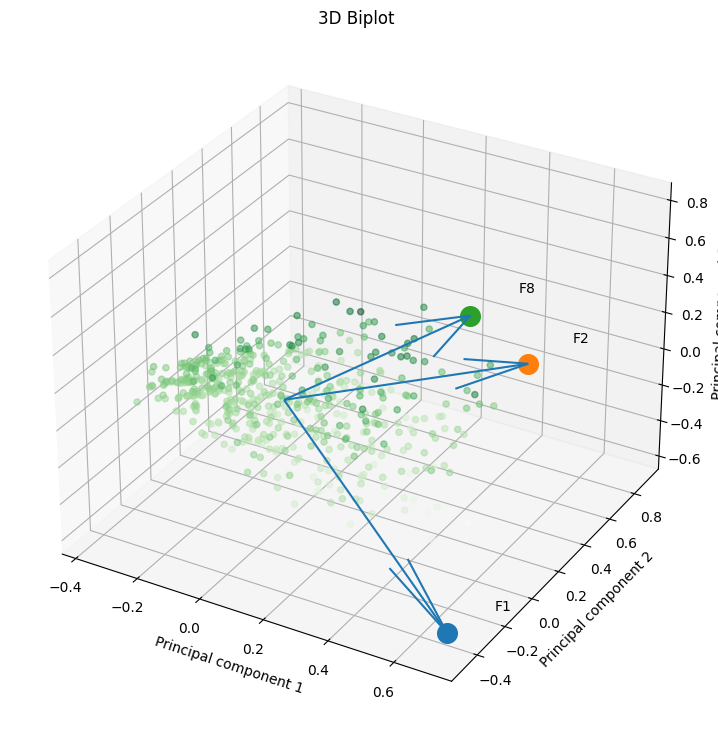

In [ ]:
# @title 3D plot { display-mode: "form" }
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')

pca = PCA(n_components=3)

# Fit and transform data
pca_features = pca.fit_transform(X_train_NORM.iloc[:,[0,1,6]])

# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3'])

# map target names to PCA features
target_names = {
    0:'F1',
    1:'F2',
    2:'F8',

}

# Apply the targett names
pca_df['target'] = X_train_NORM.C
pca_df['target'] = pca_df['target'].map(target_names)

# Create the scaled PCA dataframe
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

# Initialize the 3D graph
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')

# Define scaled features as arrays
xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']

# Plot 3D scatterplot of PCA
ax.scatter3D(
    xdata,
    ydata,
    zdata,
    c=zdata,
    cmap='Greens',
    alpha=0.5)

# Define the x, y, z variables
loadings = pca.components_
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]
feature_names = ["F1","F2","F8"]

# Plot the loadings
for i, varnames in enumerate(feature_names):
    ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.text(
        xs[i] + 0.1,
        ys[i] + 0.1,
        zs[i] + 0.1,
        varnames)

# Plot the arrows
x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs)

# Plot title of graph
plt.title(f'3D Biplot')

# Plot x, y, z labels
ax.set_xlabel('Principal component 1', rotation=150)
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3', rotation=60)

plt.show()

## TSNE Rappresentation


Furthermore, we can use the t-SNE (t-distributed Stochastic Neighbor Embedding) method, which aims to visualize the data in our training set by reducing its dimensions and representing 7 dimensions in 2. This process is based on evaluating the distances between various values on each feature, significantly computing these distances using the t-distribution. Once all values are ordered, each value will be repositioned close to its nearest neighbors. Let's set the "Exaggeration" parameter to its maximum value. This factor increases the attractive forces between points and allows them to move more freely, helping them find their nearby neighbors more easily.

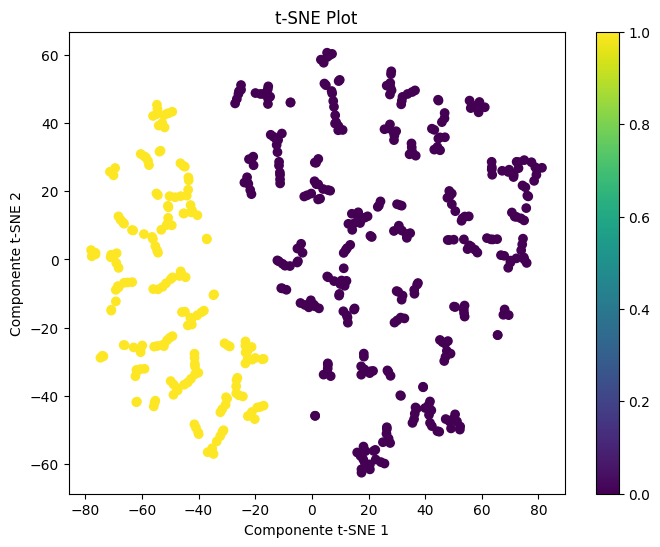

In [ ]:
# @title TSNE plot { display-mode: "form" }
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X_train_NORM)
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_train_NORM["C"], cmap="viridis")
plt.colorbar()
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('t-SNE Plot')
plt.show()

## Multi-dimensional scaling

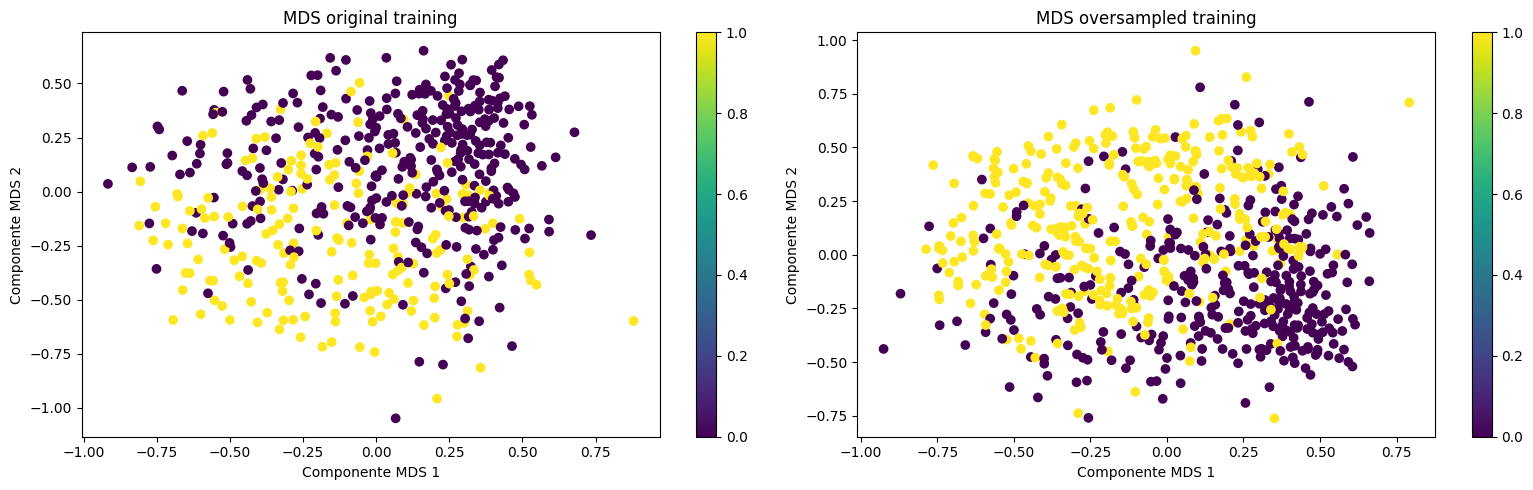

In [ ]:
# @title MDS plot { display-mode: "form" }
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

embedding = MDS(n_components=2,random_state=0,normalized_stress='auto')

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

X_transformed_1 = embedding.fit_transform(X_train_NORM.iloc[:,:-1])
scatter_1 = axs[0].scatter(X_transformed_1[:, 0], X_transformed_1[:, 1], c=X_train_NORM["C"], cmap="viridis")
axs[0].set_xlabel('Componente MDS 1')
axs[0].set_ylabel('Componente MDS 2')
fig.colorbar(scatter_1, ax=axs[0])
axs[0].set_title('MDS original training')

X_transformed_2 = embedding.fit_transform(X_train_OVERSAMPLED.iloc[:,:-1])
scatter_2 = axs[1].scatter(X_transformed_2[:, 0], -X_transformed_2[:, 1], c=X_train_OVERSAMPLED["C"], cmap="viridis")
axs[1].set_xlabel('Componente MDS 1')
axs[1].set_ylabel('Componente MDS 2')
fig.colorbar(scatter_2, ax=axs[1])
axs[1].set_title('MDS oversampled training')


plt.tight_layout()
plt.show()

# Choosing and evaluating model

## Tuning

In our analysis, we are choosing 6 classifiers:

1. Decision Tree
2. Logistic Regression
3. Naive Bayes
4. k-Nearest Neighbors
5. Support Vector Machine
6. Random Forest

For hyperparameter tuning of these models, a GridSearch algorithm has been used. This algorithm iterates over a range of parameters, performing a 10-fold cross-validation to observe which parameter settings could potentially yield the best results. Note that for the Naive Bayes method, there are no hyperparameters to set, so we are performing tuning only for the other methods. These tuning operations are conducted using the original training set.

### 1 Albero decisionale


Decision Trees are a simple and widely used classification technique in which the classification rule is described using a tree structure that can be translated into a set of if-else rules.

A Decision Tree is a hierarchical structure where each node is associated with an attribute, and each edge is associated with a value of that attribute. The nodes in a Decision Tree can be of 3 types:

1. **Root Node:** The tree's starting point, which only has outgoing branches.
2. **Internal Nodes:** These nodes have 1 incoming and N outgoing nodes.
3. **Leaves:** Also known as terminal nodes, these nodes have 1 incoming node and no outgoing nodes.

The attributes in the tree are ordered from the most important (forming the root) to the least important (preceding the leaves). Each leaf is associated with a class label, while all non-terminal nodes are associated with a discriminant condition regarding a specific attribute.

Decision Trees are powerful for their interpretability and ability to handle both categorical and numerical data. They recursively split the data into subsets based on the values of different attributes, leading to a tree structure that can make decisions for classification. However, they can be prone to overfitting, especially if not pruned properly, and might struggle with capturing complex relationships in the data.


In [ ]:
# @title Tuning tree's design parameters { display-mode: "form" }
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X, y = X_train_NORM.iloc[:,:-1], X_train_NORM.iloc[:,-1]
tree_para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_leaf':[1,2,3,4,5,6,7,8],'min_samples_split':[2,3,4,5,6,7,8]}
GSCV = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10)
GSCV.fit(X, y)
print(GSCV.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 5}


### 2 Regressione logistica

Logistic Regression is a statistical method designed to work with risk factors, widely used in biomedical fields. The model was initially developed for studying the risk of developing a disease in the presence of specific risk factors (attributes).

Logistic Regression is specifically tailored for binary classification problems, meaning it works when there are only two classes. It's a discriminative method, meaning that it directly estimates the distribution
$P(C|X)$ from the data, instead of estimating the generative model
$P(X|C)$ and the prior $P(C)$ like generative methods do.

The key idea behind Logistic Regression is to transform the linear combination of features into a probability using the logistic function, which ensures the output is between 0 and 1. This transformed probability represents the likelihood of an instance belonging to a particular class. Logistic Regression is commonly used for predicting probabilities and classifying instances based on a predefined threshold.

Due to its simplicity, interpretability, and effectiveness in various domains, Logistic Regression remains a popular choice for binary classification tasks, especially when the relationships between features and the outcome need to be analyzed.

In [ ]:
# @title Tuning regression's design parameters { display-mode: "form" }
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X, y = X_train_NORM.iloc[:,:-1], X_train_NORM.iloc[:,-1]
log_reg_model = LogisticRegression(max_iter=50000)
parameters = {'C':[0.01, 0.02, 0.03, 0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.29,0.3,0.31,0.4,0.5,0.6,0.7,0.8],'penalty':['l2']}
GSCV = GridSearchCV(log_reg_model, parameters,cv=10)
GSCV.fit(X, y)
print(GSCV.best_params_)

{'C': 0.31, 'penalty': 'l2'}


### 3 Naive Bayes

Informally known as 'Idiot (or Naive) Bayes' due to its simplicity, this algorithm is very popular and is often used as a benchmark for new algorithms in terms of accuracy. Naive Bayes assumes that all attributes are independent of each other, so the joint probability $p(X|C)$, which would require a multivariate analysis, can be decomposed into individual probabilities that are easy to calculate.

Given a class $C$ and an example $E$ consisting of a series of $m$ attributes $X$ with value $v$, such that
$E=<{X_a=v}_1,X_b=v_2,\ldots,{X_m=v}_m>\ =\ <v_i>$
$P(E|C)=P(v_1,v_2,...,v_m|C)=\prod_{i=1}^{m}{P(v_i|C)}$

However, the assumption of independence is very strong and is often not met in medical applications. To address this, the model based on the Bernoulli distribution is used.

In the Bernoulli Naive Bayes model, each feature is treated as a binary variable, and the assumption is that the presence or absence of each feature is conditionally independent of each other, given the class. This model is particularly suitable for text classification tasks, where each feature can be thought of as a word in a document and its presence or absence in the document indicates a binary value.

### 4 k-Nearest Neighbour

This category of classifiers, commonly referred to as K-Nearest Neighbors (K-Nearest), relies on the concept of similarity. The classifier has a set of known examples (training set), and it needs to determine whether the new example provided to it is similar to any of the known examples (hence the term "nearest neighbor"). The logical steps of the Nearest Neighbor classification (a LAZY LEARNER) are as follows:

1. Calculate the distance in the feature space between the target example and the examples in the training set.
2. Choose the $K$ (a crucial parameter) nearest examples in the attribute space to the target example. To calculate the distance between examples, a distance metric must be defined.
3. Voting: Use the labels of the neighbors to determine the majority class and classify the new example accordingly. It's possible to assign a greater weight to the votes of the nearest neighbors.
4. Estimate the confidence of the decision (the conditional probability of belonging to a class given the attributes). This estimation has a natural dependence on the training set and tends to have low bias and high variance.

K-Nearest Neighbors is an instance-based learning algorithm, meaning it doesn't learn a global model but stores the training data and makes decisions based on the local neighborhood of similar examples. It's a simple and intuitive classifier, but its performance can be affected by the choice of $K$ and the distance metric used. It's also important to preprocess the data and normalize features to ensure fair comparison of distances in various dimensions.


       

In [ ]:
# @title Tuning knn's design parameters { display-mode: "form" }
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X, y = X_train_NORM.iloc[:,:-1], X_train_NORM.iloc[:,-1]
parameters_KNN = {'n_neighbors': (10,20,30,40,50,60,70,80,90,100,110,120,130),'metric': ('chebyshev','cityblock','euclidean')}
GSCV = GridSearchCV(KNeighborsClassifier(), parameters_KNN, cv=10)
GSCV.fit(X, y)
print(GSCV.best_params_)

{'metric': 'cityblock', 'n_neighbors': 30}


### 5 Support vector machine

The SVM (Support Vector Machine) method is one of the most interesting and advanced techniques in machine learning today, often considered the state-of-the-art. Support Vector Machines are an extension of the K-Nearest Neighbors method but incorporate various enhancements that allow the construction of classifiers balancing low variance and flexibility, resulting in a stable classifier capable of creating even complex separation surfaces. SVMs integrate linear classification methods (such as logistic regression and discriminant analysis) and formulate an optimization problem.

In [ ]:
# @title Tuning svm's design parameters { display-mode: "form" }
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X, y = X_train_NORM.iloc[:,:-1], X_train_NORM.iloc[:,-1]
param_grid = {'C': [0.09,0.13, 0.14, 0.15, 0.16],'degree': [1, 2, 3, 4, 5,6,7,8,9,10],'kernel': ['rbf']}
GSCV = GridSearchCV(SVC(), param_grid, cv=10)
GSCV.fit(X, y)
print(GSCV.best_params_)

{'C': 0.16, 'degree': 1, 'kernel': 'rbf'}


### 6 Random forest

The starting point of Random Forests is, of course, decision trees. One method to reduce variance is pruning, but it imposes constraints, thereby increasing bias. The goal of Random Forests is to lower variance without increasing bias, which is already sufficiently low.

The idea of Random Forests is to learn multiple trees (hence the term 'forest') by generating multiple solutions and then calculating an average solution. Random Forests thus fall into the category of bagging strategies. It's a parallel algorithm.

In [ ]:
# @title Tuning random forest's design parameters { display-mode: "form" }
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X, y = X_train_NORM.iloc[:,:-1], X_train_NORM.iloc[:,-1]
param_grid = {'n_estimators': [300,400,500,600,700],'min_samples_split':[5,6,7,8,9,10,11,12,13,14,15],'max_depth' : [3,4,5,6,7,8],}
GSCV = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
GSCV.fit(X, y)
print(GSCV.best_params_)

{'max_depth': 7, 'min_samples_split': 12, 'n_estimators': 600}


# Evaluating methods

## 1 Specificity

It is the proportion of non-diabetic patients, the negative cases, identified as non-diabetic. It is calculated as the ratio of true negatives (TN) to the sum of true negatives (TN) and false positives (FP).

\begin{equation}
    Specificity = {TN \over {TN + FP}}
\end{equation}

## 2 Recall

Proportion of diabetic patients, the positive cases, correctly identified as diabetic. It is calculated as the ratio of true positives (TP) to the sum of true positives (TP) and false negatives (FN).

\begin{equation}
    Sensitivity = {TP \over {TP + FN}}
\end{equation}


## 3 Classifier precision

This is the proportion of diabetic patients, the positive cases, correctly identified as diabetic among all diabetic patients. It is calculated as the ratio of true positives (TP) to the sum of true positives (TP) and false positives (FP).

\begin{equation}
    Precision = {TP \over {TP + FP}}
\end{equation}

## 4 F1-Score

This is the weighted average of precision and recall. Consequently, this score takes into account both false positives and false negatives.

\begin{equation}
    {F1-Score} = 2* \bigg[{{(Recall * Precision) \over {(Recall + Precision)}} \bigg] }
\end{equation}


## 5 Accuracy

It is the ratio of the total number of correct predictions to the total number of predictions.

\begin{equation}
    Accuracy = {{TP + TN} \over {TP + FP + TN + FN}}
\end{equation}

## 6 K-stats

It is the ratio of the difference between observed accuracy and expected accuracy divided by 1 minus expected accuracy. This index is recently used to assess performance relative to the maximum possible performance.

\begin{equation}
    Precision = {{AO - AA} \over {1-AA}}
\end{equation}

## 7 Brier Score

It is used to assess the calibration of a model, i.e., whether the predicted probabilities are close to the true probabilities. Compared to log-loss, it penalizes inaccurate predictions less. The probability p represents the probability of the i-th record being classified correctly.

\begin{equation}
    BS = \frac{1}{n}\sum_{i=1}^n (1 - p_i)^2
\end{equation}

# Cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## ------------------------- Cross validation original training-set -------------------------

In [ ]:
# @title 10-fold original training-set { display-mode: "form" }
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=7, min_samples_split=5)
logreg_classifier = LogisticRegression(C=0.31, penalty='l2')
nb_classifier = BernoulliNB()
knn_classifier = KNeighborsClassifier(metric='cityblock', n_neighbors=30)
svm_classifier = SVC(C= 0.16, degree= 1, kernel= 'rbf')
rf_classifier = RandomForestClassifier(max_depth=7, min_samples_split=12, n_estimators=600)

classifiers = [
    ('Decision Tree', tree_classifier),
    ('Logistic Regression', logreg_classifier),
    ('Naive Bayes', nb_classifier),
    ('K-Nearest Neighbors', knn_classifier),
    ('Support Vector Machine', svm_classifier),
    ('Random Forest', rf_classifier)
]

accuracies_tree = []
accuracies_logreg = []
accuracies_nb = []
accuracies_knn = []
accuracies_svm = []
accuracies_rf = []



kf = KFold(n_splits=10)

X = X_train_NORM.iloc[:, :-1].values
y = X_train_NORM.iloc[:, -1].values

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train = np.round(y_train).astype(int)
    y_test = np.round(y_test).astype(int)

    for name,classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if classifier == tree_classifier:
            accuracies_tree.append(accuracy)
        elif classifier == logreg_classifier:
            accuracies_logreg.append(accuracy)
        elif classifier == nb_classifier:
            accuracies_nb.append(accuracy)
        elif classifier == knn_classifier:
            accuracies_knn.append(accuracy)
        elif classifier == svm_classifier:
            accuracies_svm.append(accuracy)
        elif classifier == rf_classifier:
            accuracies_rf.append(accuracy)

print("accuracies Decision Tree:", np.round(accuracies_tree,decimals = 4))
print("accuracies Logistic Regression:", np.round(accuracies_logreg,decimals = 4))
print("accuracies Naive Bayes:", np.round(accuracies_nb,decimals = 4))
print("accuracies K-Nearest Neighbors:", np.round(accuracies_knn,decimals = 4))
print("accuracies Support Vector Machine:", np.round(accuracies_svm,decimals = 4))
print("accuracies Random Forest:", np.round(accuracies_rf,decimals = 4))

accuracies Decision Tree: [0.7593 0.7963 0.7547 0.7547 0.7736 0.8491 0.7736 0.7925 0.7547 0.7547]
accuracies Logistic Regression: [0.7037 0.7593 0.7925 0.8491 0.7358 0.8113 0.8302 0.717  0.7925 0.7547]
accuracies Naive Bayes: [0.7037 0.5926 0.6604 0.7547 0.5849 0.6792 0.6981 0.5472 0.717  0.5849]
accuracies K-Nearest Neighbors: [0.7037 0.6481 0.7925 0.8491 0.7358 0.8302 0.7925 0.717  0.7925 0.7358]
accuracies Support Vector Machine: [0.7222 0.7222 0.8113 0.8491 0.717  0.8302 0.8302 0.7736 0.8113 0.717 ]
accuracies Random Forest: [0.7593 0.7593 0.717  0.8302 0.7547 0.8113 0.8113 0.7736 0.8491 0.717 ]


In [ ]:
# @title Propedeutical ks-test to apply anova { display-mode: "form" }
from scipy.stats import norm, ks_2samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

all_accuracies = np.array([accuracies_tree, accuracies_logreg, accuracies_nb,
                           accuracies_knn, accuracies_svm, accuracies_rf])

labels = ['Decision Tree', 'Logistic Regression', 'Naive Bayes',
          'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']

#################### Propedeutical ks-test to apply anova ######################
normal_std = np.std(all_accuracies)
ks_results = []
for accuracies in all_accuracies:
    ks_statistic, ks_p_value = ks_2samp(accuracies, norm.rvs(loc=np.mean(accuracies), scale=normal_std, size=len(accuracies)))
    ks_results.append((ks_statistic, ks_p_value))

print("---------- KS Test results for each classifier: ----------")
for i, classifier_label in enumerate(labels):
    ks_statistic, ks_p_value = ks_results[i]
    print(f"{classifier_label}: KS Statistic={ks_statistic:.4f}, p-value={ks_p_value:.4f}")
print("----------------------------------------------------------")

---------- KS Test results for each classifier: ----------
Decision Tree: KS Statistic=0.5000, p-value=0.1678
Logistic Regression: KS Statistic=0.3000, p-value=0.7869
Naive Bayes: KS Statistic=0.2000, p-value=0.9945
K-Nearest Neighbors: KS Statistic=0.3000, p-value=0.7869
Support Vector Machine: KS Statistic=0.3000, p-value=0.7869
Random Forest: KS Statistic=0.2000, p-value=0.9945
----------------------------------------------------------


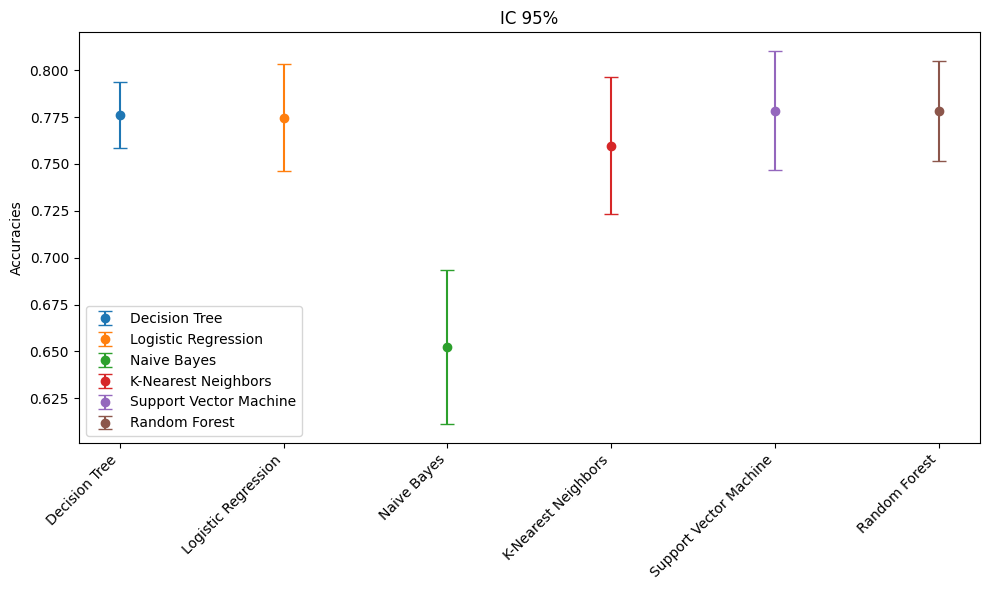

In [ ]:
# @title IC { display-mode: "form" }
################################# Calculate IC #################################

def confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    z_critical = norm.ppf(0.975)
    margin_of_error = z_critical * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

confidence_intervals = []
for accuracies in [accuracies_tree, accuracies_logreg, accuracies_nb,
                   accuracies_knn, accuracies_svm, accuracies_rf]:
    ci = confidence_interval(accuracies)
    confidence_intervals.append(ci)

plt.figure(figsize=(10, 6))
for i, ci in enumerate(confidence_intervals):
    plt.errorbar(labels[i], np.mean(all_accuracies[i::6]),
                 yerr=(ci[1] - ci[0]) / 2, fmt='o', capsize=5, label=labels[i])
plt.ylabel('Accuracies')
plt.title('IC 95%')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0017    1.0  -0.072  0.0686  False
     0      2   -0.124    0.0 -0.1944 -0.0537   True
     0      3  -0.0166 0.9815 -0.0869  0.0537  False
     0      4   0.0021    1.0 -0.0682  0.0724  False
     0      5    0.002    1.0 -0.0684  0.0723  False
     1      2  -0.1223 0.0001 -0.1926  -0.052   True
     1      3  -0.0149 0.9886 -0.0852  0.0554  False
     1      4   0.0038    1.0 -0.0665  0.0741  False
     1      5   0.0037    1.0 -0.0666   0.074  False
     2      3   0.1074 0.0005  0.0371  0.1778   True
     2      4   0.1261    0.0  0.0558  0.1965   True
     2      5    0.126    0.0  0.0557  0.1963   True
     3      4   0.0187 0.9689 -0.0516   0.089  False
     3      5   0.0186 0.9698 -0.0518  0.0889  False
     4      5  -0.0001    1.0 -0.0705  0.0702  False
----------------------------------------------

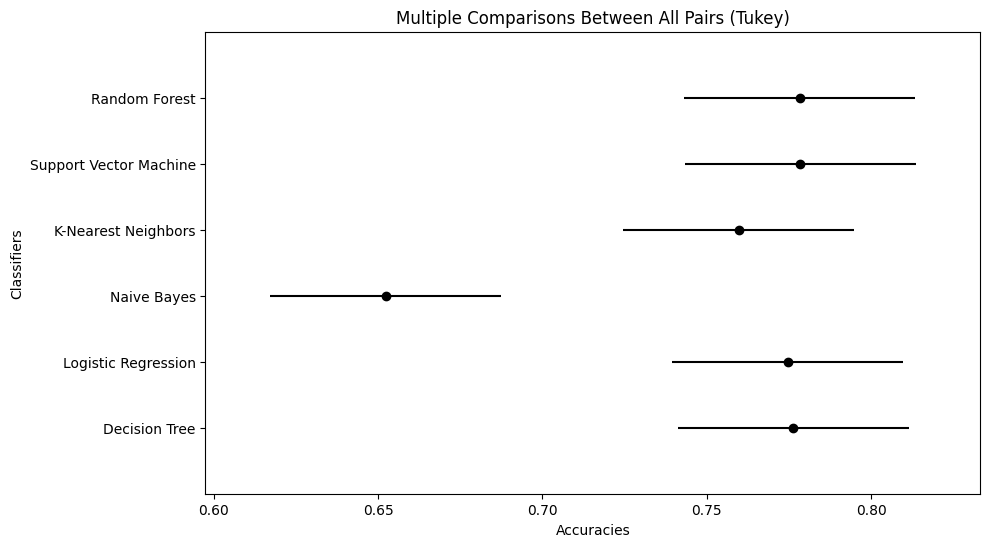

In [ ]:
# @title Two-ways anova { display-mode: "form" }
############################### Two-ways anova #################################

tukey_results = pairwise_tukeyhsd(all_accuracies.ravel(), np.repeat(np.arange(len(labels)), len(accuracies_tree)),0.05)
print(tukey_results)

fig, ax = plt.subplots(figsize=(10, 6))
tukey_results.plot_simultaneous(ax=ax)
ax.set_ylabel("Classifiers")
ax.set_xlabel("Accuracies")

# Personalizza le etichette sull'asse y
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

plt.show()

We observe that the mean accuracy is significantly different for the Naive classifier compared to the k-Nearest Neighbors (knn) classifier. Since no obvious differences in results are obtained for the other classifiers, I will proceed to analyze the outcome of the cross-validation on the balanced set using SMOTE.

## ------------------------- Cross validation oversampled training-set -------------------------

I choose 30 as the fold to not reject the hypothesis of normality.

In [ ]:
# @title 30-fold original training-set { display-mode: "form" }
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=7, min_samples_split=5)
logreg_classifier = LogisticRegression(C=0.31, penalty='l2')
nb_classifier = BernoulliNB()
knn_classifier = KNeighborsClassifier(metric='cityblock', n_neighbors=30)
svm_classifier = SVC(C= 0.16, degree= 1, kernel= 'rbf')
rf_classifier = RandomForestClassifier(max_depth=7, min_samples_split=12, n_estimators=600)

classifiers = [
    ('Decision Tree', tree_classifier),
    ('Logistic Regression', logreg_classifier),
    ('Naive Bayes', nb_classifier),
    ('K-Nearest Neighbors', knn_classifier),
    ('Support Vector Machine', svm_classifier),
    ('Random Forest', rf_classifier)
]

accuracies_tree = []
accuracies_logreg = []
accuracies_nb = []
accuracies_knn = []
accuracies_svm = []
accuracies_rf = []


kf = KFold(n_splits=30)

X = X_train_OVERSAMPLED.iloc[:, :-1].values
y = X_train_OVERSAMPLED.iloc[:, -1].values

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train = np.round(y_train).astype(int)
    y_test = np.round(y_test).astype(int)

    for name,classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if classifier == tree_classifier:
            accuracies_tree.append(accuracy)
        elif classifier == logreg_classifier:
            accuracies_logreg.append(accuracy)
        elif classifier == nb_classifier:
            accuracies_nb.append(accuracy)
        elif classifier == knn_classifier:
            accuracies_knn.append(accuracy)
        elif classifier == svm_classifier:
            accuracies_svm.append(accuracy)
        elif classifier == rf_classifier:
            accuracies_rf.append(accuracy)

print("accuracies Decision Tree:", np.round(accuracies_tree,decimals = 4))
print("accuracies Logistic Regression:", np.round(accuracies_logreg,decimals = 4))
print("accuracies Naive Bayes:", np.round(accuracies_nb,decimals = 4))
print("accuracies K-Nearest Neighbors:", np.round(accuracies_knn,decimals = 4))
print("accuracies Support Vector Machine:", np.round(accuracies_svm,decimals = 4))
print("accuracies Random Forest:", np.round(accuracies_rf,decimals = 4))

accuracies Decision Tree: [0.8333 0.7083 0.75   0.75   0.8696 0.6522 0.5652 0.8261 0.7391 0.7391
 0.7391 0.6522 0.8261 0.8261 0.8696 0.7826 0.6957 0.7391 0.6522 0.7391
 0.7391 0.7391 0.7391 0.913  0.913  0.913  0.7826 0.7826 0.7826 0.6957]
accuracies Logistic Regression: [0.7917 0.6667 0.75   0.7083 0.7391 0.7391 0.6957 0.7826 0.7391 0.913
 0.6957 0.8261 0.7391 0.7826 0.8261 0.7826 0.6522 0.8261 0.6522 0.6957
 0.6087 0.6957 0.7391 0.8261 0.7826 0.7391 0.7826 0.7391 0.7826 0.7391]
accuracies Naive Bayes: [0.4167 0.4167 0.4583 0.4167 0.4348 0.3043 0.4348 0.5217 0.3478 0.6522
 0.3478 0.6087 0.3478 0.2174 0.3478 0.3478 0.4348 0.5217 0.3043 0.5217
 0.3913 0.4348 0.6087 0.913  0.913  0.9565 0.9565 0.8696 0.8696 0.913 ]
accuracies K-Nearest Neighbors: [0.7917 0.625  0.75   0.6667 0.7826 0.7391 0.6522 0.8261 0.7826 0.8261
 0.7391 0.8261 0.7391 0.7826 0.913  0.7391 0.7826 0.8261 0.6087 0.6957
 0.8261 0.7826 0.7391 0.913  0.8696 0.7826 1.     0.8261 0.7826 0.8261]
accuracies Support Vector Machi

In [ ]:
# @title Propedeutical ks-test to apply anova { display-mode: "form" }
from scipy.stats import norm, ks_2samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

all_accuracies = np.array([accuracies_tree, accuracies_logreg, accuracies_nb,
                           accuracies_knn, accuracies_svm, accuracies_rf])

labels = ['Decision Tree', 'Logistic Regression', 'Naive Bayes',
          'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']

#################### Propedeutical ks-test to apply anova ######################
normal_std = np.std(all_accuracies)
ks_results = []
for accuracies in all_accuracies:
    ks_statistic, ks_p_value = ks_2samp(accuracies, norm.rvs(loc=np.mean(accuracies), scale=normal_std, size=len(accuracies)))
    ks_results.append((ks_statistic, ks_p_value))

print("---------- KS Test results for each classifier: ----------")
for i, classifier_label in enumerate(labels):
    ks_statistic, ks_p_value = ks_results[i]
    print(f"{classifier_label}: KS Statistic={ks_statistic:.4f}, p-value={ks_p_value:.4f}")
print("----------------------------------------------------------")

---------- KS Test results for each classifier: ----------
Decision Tree: KS Statistic=0.2333, p-value=0.3929
Logistic Regression: KS Statistic=0.2667, p-value=0.2391
Naive Bayes: KS Statistic=0.3000, p-value=0.1350
K-Nearest Neighbors: KS Statistic=0.2000, p-value=0.5941
Support Vector Machine: KS Statistic=0.2667, p-value=0.2391
Random Forest: KS Statistic=0.2333, p-value=0.3929
----------------------------------------------------------


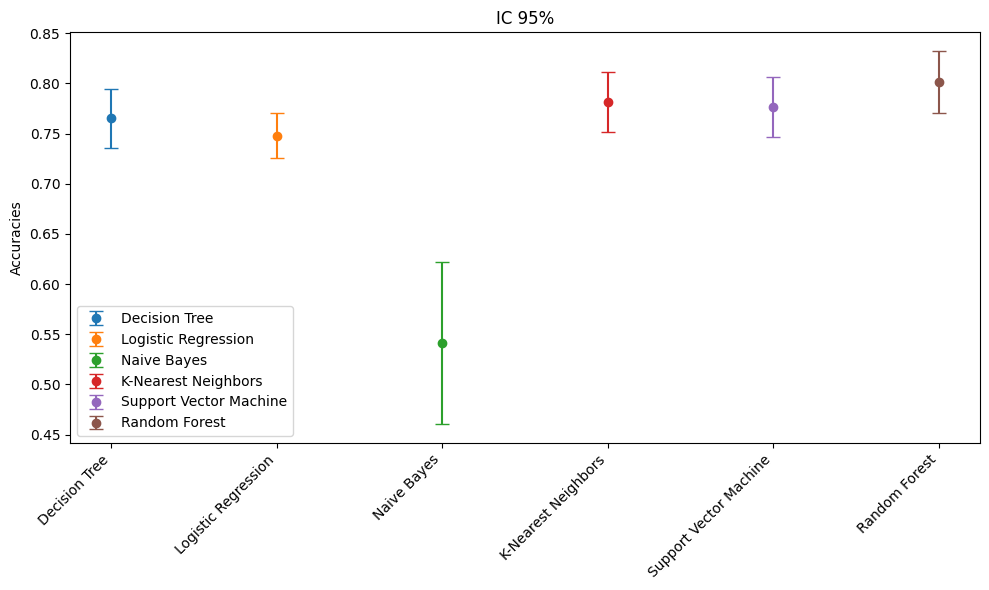

In [ ]:
# @title IC { display-mode: "form" }
################################# Calculate IC #################################

def confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    z_critical = norm.ppf(0.975)
    margin_of_error = z_critical * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

confidence_intervals = []
for accuracies in [accuracies_tree, accuracies_logreg, accuracies_nb,
                   accuracies_knn, accuracies_svm, accuracies_rf]:
    ci = confidence_interval(accuracies)
    confidence_intervals.append(ci)

plt.figure(figsize=(10, 6))
for i, ci in enumerate(confidence_intervals):
    plt.errorbar(labels[i], np.mean(all_accuracies[i::6]),
                 yerr=(ci[1] - ci[0]) / 2, fmt='o', capsize=5, label=labels[i])
plt.ylabel('Accuracies')
plt.title('IC 95%')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0172 0.9935  -0.106  0.0716  False
     0      2  -0.2242    0.0  -0.313 -0.1353   True
     0      3   0.0162  0.995 -0.0726  0.1051  False
     0      4   0.0116  0.999 -0.0772  0.1004  False
     0      5   0.0363 0.8471 -0.0525  0.1251  False
     1      2  -0.2069    0.0 -0.2958 -0.1181   True
     1      3   0.0335 0.8867 -0.0554  0.1223  False
     1      4   0.0288 0.9371   -0.06  0.1176  False
     1      5   0.0535 0.5102 -0.0353  0.1423  False
     2      3   0.2404    0.0  0.1516  0.3292   True
     2      4   0.2357    0.0  0.1469  0.3246   True
     2      5   0.2604    0.0  0.1716  0.3493   True
     3      4  -0.0046    1.0 -0.0935  0.0842  False
     3      5     0.02 0.9869 -0.0688  0.1089  False
     4      5   0.0247  0.967 -0.0641  0.1135  False
----------------------------------------------

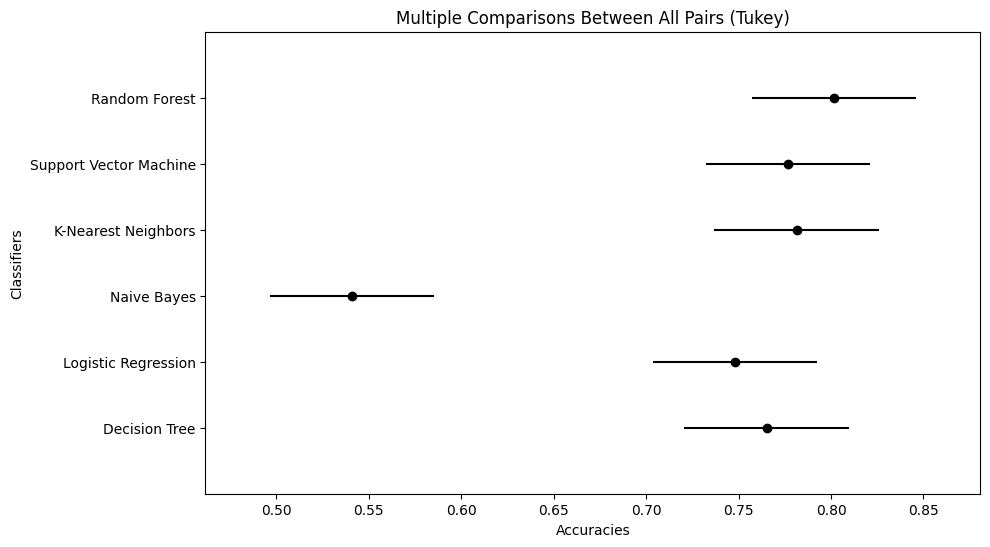

In [ ]:
# @title Two-ways anova { display-mode: "form" }
############################### Two-ways anova #################################

tukey_results = pairwise_tukeyhsd(all_accuracies.ravel(), np.repeat(np.arange(len(labels)), len(accuracies_tree)),0.05)
print(tukey_results)

fig, ax = plt.subplots(figsize=(10, 6))
tukey_results.plot_simultaneous(ax=ax)
ax.set_ylabel("Classifiers")
ax.set_xlabel("Accuracies")

# Personalizza le etichette sull'asse y
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

plt.show()

As before, we observe that the mean accuracy is significantly different for the Naive classifier and the k-Nearest Neighbors (knn) classifier. Not obtaining any clear results for the differences between the other classifiers, I proceed to analyze the result of cross-validation on the dataset with data augmentation.

## ------------------------- Cross validation augmented training-set -------------------------

I choose 30 as the number of folds to not reject the hypothesis of normality.

In [ ]:
# @title 30-fold original training-set { display-mode: "form" }
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=7, min_samples_split=5)
logreg_classifier = LogisticRegression(C=0.31, penalty='l2')
nb_classifier = BernoulliNB()
knn_classifier = KNeighborsClassifier(metric='cityblock', n_neighbors=30)
svm_classifier = SVC(C= 0.16, degree= 1, kernel= 'rbf')
rf_classifier = RandomForestClassifier(max_depth=7, min_samples_split=12, n_estimators=600)

classifiers = [
    ('Decision Tree', tree_classifier),
    ('Logistic Regression', logreg_classifier),
    ('Naive Bayes', nb_classifier),
    ('K-Nearest Neighbors', knn_classifier),
    ('Support Vector Machine', svm_classifier),
    ('Random Forest', rf_classifier)
]

accuracies_tree = []
accuracies_logreg = []
accuracies_nb = []
accuracies_knn = []
accuracies_svm = []
accuracies_rf = []

kf = KFold(n_splits=10)

X = X_train_AUGMENTED.iloc[:, :-1].values
y = X_train_AUGMENTED.iloc[:, -1].values

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_train = np.round(y_train).astype(int)
    y_test = np.round(y_test).astype(int)

    for name,classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if classifier == tree_classifier:
            accuracies_tree.append(accuracy)
        elif classifier == logreg_classifier:
            accuracies_logreg.append(accuracy)
        elif classifier == nb_classifier:
            accuracies_nb.append(accuracy)
        elif classifier == knn_classifier:
            accuracies_knn.append(accuracy)
        elif classifier == svm_classifier:
            accuracies_svm.append(accuracy)
        elif classifier == rf_classifier:
            accuracies_rf.append(accuracy)

print("accuracies Decision Tree:", np.round(accuracies_tree,decimals = 4))
print("accuracies Logistic Regression:", np.round(accuracies_logreg,decimals = 4))
print("accuracies Naive Bayes:", np.round(accuracies_nb,decimals = 4))
print("accuracies K-Nearest Neighbors:", np.round(accuracies_knn,decimals = 4))
print("accuracies Support Vector Machine:", np.round(accuracies_svm,decimals = 4))
print("accuracies Random Forest:", np.round(accuracies_rf,decimals = 4))

accuracies Decision Tree: [0.8618 0.8382 0.8206 0.8824 0.8382 0.7618 0.8324 0.7882 0.7647 0.8   ]
accuracies Logistic Regression: [0.7647 0.7118 0.7382 0.7618 0.7706 0.6941 0.6676 0.8088 0.5882 0.6794]
accuracies Naive Bayes: [0.4059 0.2882 0.1059 0.0765 0.0882 0.3912 0.     0.     0.     0.    ]
accuracies K-Nearest Neighbors: [0.8559 0.8706 0.8382 0.9118 0.8059 0.8412 0.8824 0.9059 0.8971 0.8765]
accuracies Support Vector Machine: [0.7971 0.7441 0.7235 0.7618 0.7912 0.7441 0.7471 0.8706 0.6176 0.7147]
accuracies Random Forest: [0.8618 0.8176 0.7676 0.8529 0.8235 0.7735 0.8735 0.8824 0.8029 0.8647]


In [ ]:
# @title Propedeutical ks-test to apply anova { display-mode: "form" }
from scipy.stats import norm, ks_2samp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

all_accuracies = np.array([accuracies_tree, accuracies_logreg, accuracies_nb,
                           accuracies_knn, accuracies_svm, accuracies_rf])

labels = ['Decision Tree', 'Logistic Regression', 'Naive Bayes',
          'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']

#################### Propedeutical ks-test to apply anova ######################
normal_std = np.std(all_accuracies)
ks_results = []
for accuracies in all_accuracies:
    ks_statistic, ks_p_value = ks_2samp(accuracies, norm.rvs(loc=np.mean(accuracies), scale=normal_std, size=len(accuracies)))
    ks_results.append((ks_statistic, ks_p_value))

print("---------- KS Test results for each classifier: ----------")
for i, classifier_label in enumerate(labels):
    ks_statistic, ks_p_value = ks_results[i]
    print(f"{classifier_label}: KS Statistic={ks_statistic:.4f}, p-value={ks_p_value:.4f}")
print("----------------------------------------------------------")

---------- KS Test results for each classifier: ----------
Decision Tree: KS Statistic=0.5000, p-value=0.1678
Logistic Regression: KS Statistic=0.4000, p-value=0.4175
Naive Bayes: KS Statistic=0.4000, p-value=0.4175
K-Nearest Neighbors: KS Statistic=0.6000, p-value=0.0524
Support Vector Machine: KS Statistic=0.3000, p-value=0.7869
Random Forest: KS Statistic=0.5000, p-value=0.1678
----------------------------------------------------------


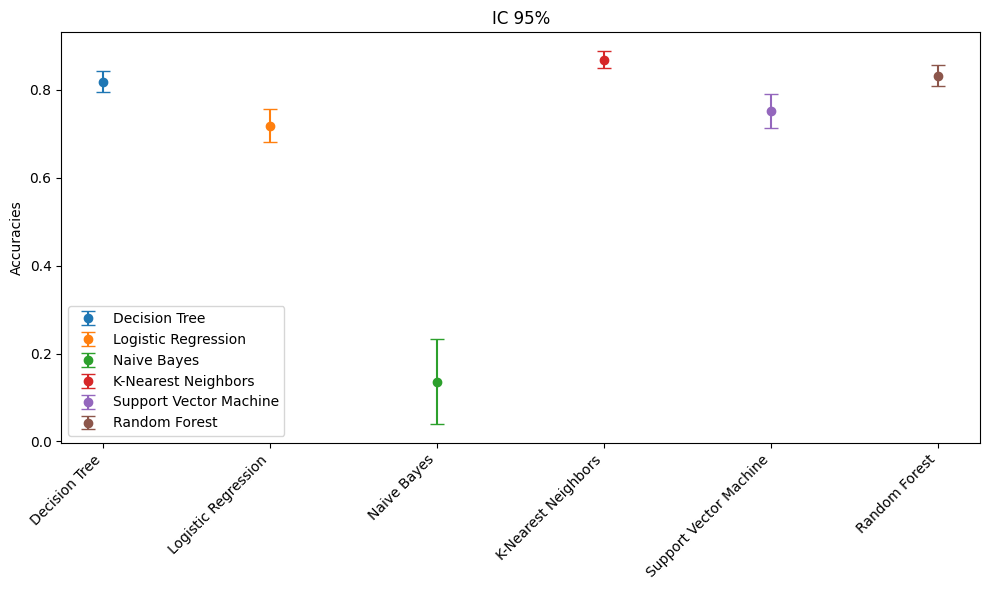

In [ ]:
# @title IC { display-mode: "form" }
################################# Calculate IC #################################

def confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    z_critical = norm.ppf(0.975)
    margin_of_error = z_critical * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

confidence_intervals = []
for accuracies in [accuracies_tree, accuracies_logreg, accuracies_nb,
                   accuracies_knn, accuracies_svm, accuracies_rf]:
    ci = confidence_interval(accuracies)
    confidence_intervals.append(ci)

plt.figure(figsize=(10, 6))
for i, ci in enumerate(confidence_intervals):
    plt.errorbar(labels[i], np.mean(all_accuracies[i::6]),
                 yerr=(ci[1] - ci[0]) / 2, fmt='o', capsize=5, label=labels[i])
plt.ylabel('Accuracies')
plt.title('IC 95%')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1003 0.0801 -0.2077  0.0071  False
     0      2  -0.6832    0.0 -0.7906 -0.5759   True
     0      3   0.0497 0.7458 -0.0577  0.1571  False
     0      4  -0.0676 0.4366  -0.175  0.0397  False
     0      5   0.0132 0.9991 -0.0941  0.1206  False
     1      2  -0.5829    0.0 -0.6903 -0.4756   True
     1      3     0.15 0.0017  0.0426  0.2574   True
     1      4   0.0326 0.9453 -0.0747    0.14  False
     1      5   0.1135 0.0324  0.0061  0.2209   True
     2      3   0.7329    0.0  0.6256  0.8403   True
     2      4   0.6156    0.0  0.5082   0.723   True
     2      5   0.6965    0.0  0.5891  0.8039   True
     3      4  -0.1174 0.0245 -0.2247   -0.01   True
     3      5  -0.0365 0.9148 -0.1439  0.0709  False
     4      5   0.0809 0.2434 -0.0265  0.1883  False
----------------------------------------------

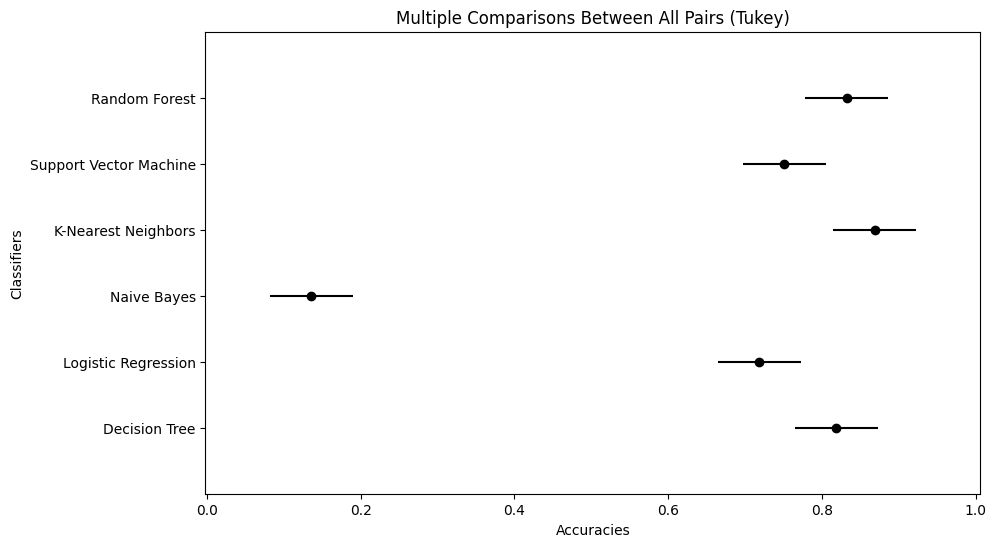

In [ ]:
# @title Two-ways anova { display-mode: "form" }
############################### Two-ways anova #################################

tukey_results = pairwise_tukeyhsd(all_accuracies.ravel(), np.repeat(np.arange(len(labels)), len(accuracies_tree)),0.05)
print(tukey_results)

fig, ax = plt.subplots(figsize=(10, 6))
tukey_results.plot_simultaneous(ax=ax)
ax.set_ylabel("Classifiers")
ax.set_xlabel("Accuracies")

# Personalizza le etichette sull'asse y
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

plt.show()

As before, we observe that the mean accuracy is significantly different for the Naive classifier. We can also observe statistically significant differences for the Random Forest and KNN classifiers compared to logistic regression. Currently, the classifiers with the best results are Random Forest and KNN. We can proceed to observe the results on the previously extracted test set.


# Evaluating models training-augmented on test-set

---------- Decision Tree ----------
 Accuracy = 0.6447368421052632
 Spec = 0.5973154362416108
 Recall = 0.7341772151898734
 Cohen-k = 0.29704628501827046
 F1 score = 0.5888324873096448
 Brier-score = 0.2893213919578694
---------- Logistic Regression ----------
 Accuracy = 0.6885964912280702
 Spec = 0.5906040268456376
 Recall = 0.8734177215189873
 Cohen-k = 0.402921215697846
 F1 score = 0.6602870813397128
 Brier-score = 0.21689581133751756
---------- Naive Bayes ----------
 Accuracy = 0.4692982456140351
 Spec = 0.28187919463087246
 Recall = 0.8227848101265823
 Cohen-k = 0.08199121522693997
 F1 score = 0.5179282868525896
 Brier-score = 0.2335418683473493
---------- K-Nearest Neighbors ----------
 Accuracy = 0.7324561403508771
 Spec = 0.6711409395973155
 Recall = 0.8481012658227848
 Cohen-k = 0.4677789683147099
 F1 score = 0.6871794871794872
 Brier-score = 0.2065740740740741
---------- Support Vector Machine ----------
 Accuracy = 0.7236842105263158
 Spec = 0.6711409395973155
 Recall = 0.

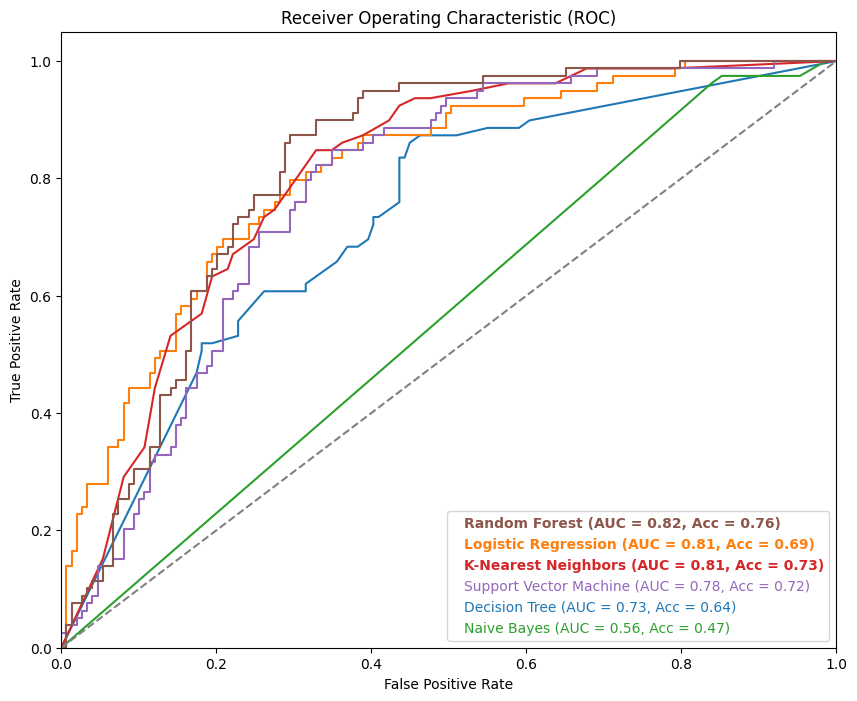

In [ ]:
# @title Evaluating script { display-mode: "form" }
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.font_manager import FontProperties
from sklearn.metrics import brier_score_loss, recall_score, f1_score, confusion_matrix,cohen_kappa_score

classifiers = [
    ('Decision Tree', tree_classifier),
    ('Logistic Regression', logreg_classifier),
    ('Naive Bayes', nb_classifier),
    ('K-Nearest Neighbors', knn_classifier),
    ('Support Vector Machine', svm_classifier),
    ('Random Forest', rf_classifier)
]

def get_sort_indices(valori):
    indici_ordinati = [indice for indice, _ in sorted(enumerate(valori), key=lambda x: (x[1], -x[0]), reverse=True)]
    return indici_ordinati


scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(X_TEST)
normalized_test = pd.DataFrame(normalized_data, columns=X_TEST.columns)

X_train = X_train_AUGMENTED.iloc[:, :-1].values
y_train = X_train_AUGMENTED.iloc[:, -1].values
x_test = normalized_test.iloc[:, :-1].values
y_test = normalized_test.iloc[:, -1].values

roc_auc_values = []
accuracy_values = []
brier_score_values = []
specificity_values = []
recall_values = []
f1_values = []
kappa_values = []

plt.figure(figsize=(10, 8))
color_dict = {}
handles = []

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(x_test)
    y_prob = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)


    accuracy = accuracy_score(y_test, y_pred)
    roc_auc_values.append((name, roc_auc))
    accuracy_values.append((name, accuracy))

    brier_score = brier_score_loss(y_test, y_prob)
    brier_score_values.append((name, brier_score))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_values.append((name, specificity))

    recall = recall_score(y_test, y_pred)
    recall_values.append((name, recall))

    f1 = f1_score(y_test, y_pred)
    f1_values.append((name, f1))

    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_values.append((name, kappa))

    print("---------- " + name + " ----------")
    print(" Accuracy = " +  str(accuracy))
    print(" Spec = " + str(specificity))
    print(" Recall = " + str(recall))
    print(" Cohen-k = " + str(kappa))
    print(" F1 score = " + str(f1))
    print(" Brier-score = " + str(brier_score))




    line, = plt.plot(fpr, tpr, label=name)
    color_dict[name] = line.get_color()
    handles.append(line)


indexes = get_sort_indices([val for _, val in roc_auc_values])



roc_auc_values.sort(key=lambda x: x[1], reverse=True)
accuracy_values = [accuracy_values[i] for i in indexes]

ordered_classifiers = [name for name, auc_val in roc_auc_values]

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

fontprops = FontProperties(weight='bold')
leg = plt.legend(handles=handles, loc='lower right', handlelength=0)

for text, (new_name, auc_val), (_, accuracy_val) in zip(leg.get_texts(), roc_auc_values, accuracy_values):
    text.set_text(f'{new_name} (AUC = {auc_val:.2f}, Acc = {accuracy_val:.2f})')
    text.set_color(color_dict[new_name])

ordered_legend_labels = [name for name, _ in roc_auc_values]

for i, text in enumerate(leg.get_texts()):
    if i < 3:
        text.set_fontproperties(fontprops)

plt.show()


# Evaluating models training-oversampled on test-set

---------- Decision Tree ----------
 Accuracy = 0.7105263157894737
 Spec = 0.697986577181208
 Recall = 0.7341772151898734
 Cohen-k = 0.40337800333042584
 F1 score = 0.6373626373626373
 Brier-score = 0.2169841619604019
---------- Logistic Regression ----------
 Accuracy = 0.7017543859649122
 Spec = 0.6308724832214765
 Recall = 0.8354430379746836
 Cohen-k = 0.4145457291745336
 F1 score = 0.66
 Brier-score = 0.19676687258663145
---------- Naive Bayes ----------
 Accuracy = 0.4692982456140351
 Spec = 0.28187919463087246
 Recall = 0.8227848101265823
 Cohen-k = 0.08199121522693997
 F1 score = 0.5179282868525896
 Brier-score = 0.238769021242372
---------- K-Nearest Neighbors ----------
 Accuracy = 0.7192982456140351
 Spec = 0.6510067114093959
 Recall = 0.8481012658227848
 Cohen-k = 0.44605572849441955
 F1 score = 0.6767676767676768
 Brier-score = 0.19599902534113062
---------- Support Vector Machine ----------
 Accuracy = 0.7192982456140351
 Spec = 0.6577181208053692
 Recall = 0.8354430379746

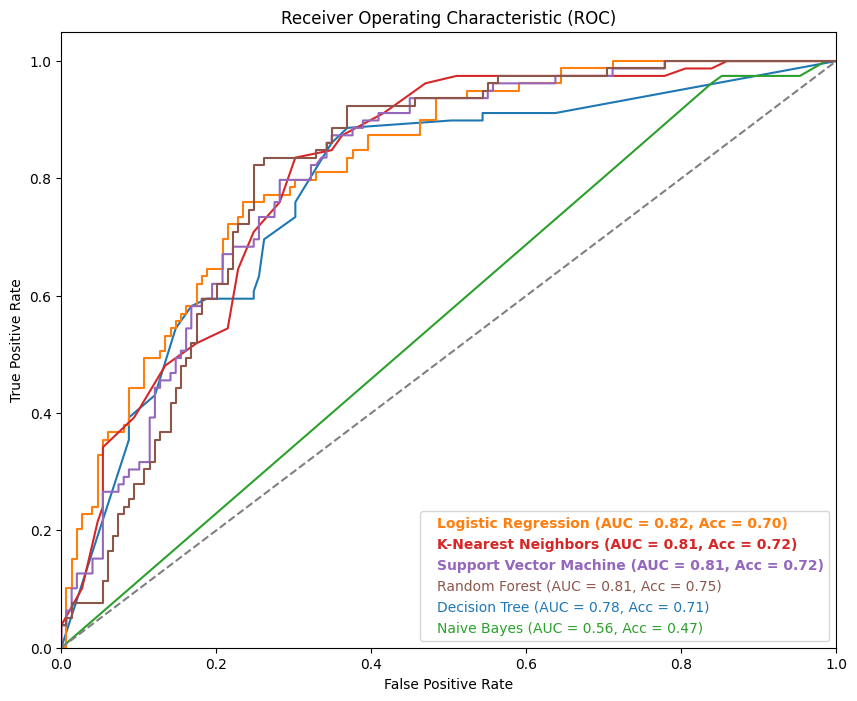

In [ ]:
# @title Evaluating script { display-mode: "form" }
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.font_manager import FontProperties
from sklearn.metrics import brier_score_loss, recall_score, f1_score, confusion_matrix,cohen_kappa_score

classifiers = [
    ('Decision Tree', tree_classifier),
    ('Logistic Regression', logreg_classifier),
    ('Naive Bayes', nb_classifier),
    ('K-Nearest Neighbors', knn_classifier),
    ('Support Vector Machine', svm_classifier),
    ('Random Forest', rf_classifier)
]

def get_sort_indices(valori):
    indici_ordinati = [indice for indice, _ in sorted(enumerate(valori), key=lambda x: (x[1], -x[0]), reverse=True)]
    return indici_ordinati


scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(X_TEST)
normalized_test = pd.DataFrame(normalized_data, columns=X_TEST.columns)

X_train = X_train_OVERSAMPLED.iloc[:, :-1].values
y_train = X_train_OVERSAMPLED.iloc[:, -1].values
x_test = normalized_test.iloc[:, :-1].values
y_test = normalized_test.iloc[:, -1].values

roc_auc_values = []
accuracy_values = []
brier_score_values = []
specificity_values = []
recall_values = []
f1_values = []
kappa_values = []

plt.figure(figsize=(10, 8))
color_dict = {}
handles = []

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(x_test)
    y_prob = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)


    accuracy = accuracy_score(y_test, y_pred)
    roc_auc_values.append((name, roc_auc))
    accuracy_values.append((name, accuracy))

    brier_score = brier_score_loss(y_test, y_prob)
    brier_score_values.append((name, brier_score))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_values.append((name, specificity))

    recall = recall_score(y_test, y_pred)
    recall_values.append((name, recall))

    f1 = f1_score(y_test, y_pred)
    f1_values.append((name, f1))

    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_values.append((name, kappa))

    print("---------- " + name + " ----------")
    print(" Accuracy = " +  str(accuracy))
    print(" Spec = " + str(specificity))
    print(" Recall = " + str(recall))
    print(" Cohen-k = " + str(kappa))
    print(" F1 score = " + str(f1))
    print(" Brier-score = " + str(brier_score))




    line, = plt.plot(fpr, tpr, label=name)
    color_dict[name] = line.get_color()
    handles.append(line)


indexes = get_sort_indices([val for _, val in roc_auc_values])



roc_auc_values.sort(key=lambda x: x[1], reverse=True)
accuracy_values = [accuracy_values[i] for i in indexes]

ordered_classifiers = [name for name, auc_val in roc_auc_values]

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

fontprops = FontProperties(weight='bold')
leg = plt.legend(handles=handles, loc='lower right', handlelength=0)

for text, (new_name, auc_val), (_, accuracy_val) in zip(leg.get_texts(), roc_auc_values, accuracy_values):
    text.set_text(f'{new_name} (AUC = {auc_val:.2f}, Acc = {accuracy_val:.2f})')
    text.set_color(color_dict[new_name])

ordered_legend_labels = [name for name, _ in roc_auc_values]

for i, text in enumerate(leg.get_texts()):
    if i < 3:
        text.set_fontproperties(fontprops)

plt.show()


# Evaluating models original training on test-set

---------- Decision Tree ----------
 Accuracy = 0.7236842105263158
 Spec = 0.7449664429530202
 Recall = 0.6835443037974683
 Cohen-k = 0.4125633894977916
 F1 score = 0.6315789473684211
 Brier-score = 0.21731055170891192
---------- Logistic Regression ----------
 Accuracy = 0.7456140350877193
 Spec = 0.825503355704698
 Recall = 0.5949367088607594
 Cohen-k = 0.4280771559553672
 F1 score = 0.618421052631579
 Brier-score = 0.16896401825123364
---------- Naive Bayes ----------
 Accuracy = 0.6535087719298246
 Spec = 1.0
 Recall = 0.0
 Cohen-k = 0.0
 F1 score = 0.0
 Brier-score = 0.218407341693558
---------- K-Nearest Neighbors ----------
 Accuracy = 0.7192982456140351
 Spec = 0.785234899328859
 Recall = 0.5949367088607594
 Cohen-k = 0.3801716081896185
 F1 score = 0.5949367088607594
 Brier-score = 0.16869395711500976
---------- Support Vector Machine ----------
 Accuracy = 0.7324561403508771
 Spec = 0.8120805369127517
 Recall = 0.5822784810126582
 Cohen-k = 0.4003104518799586
 F1 score = 0.601

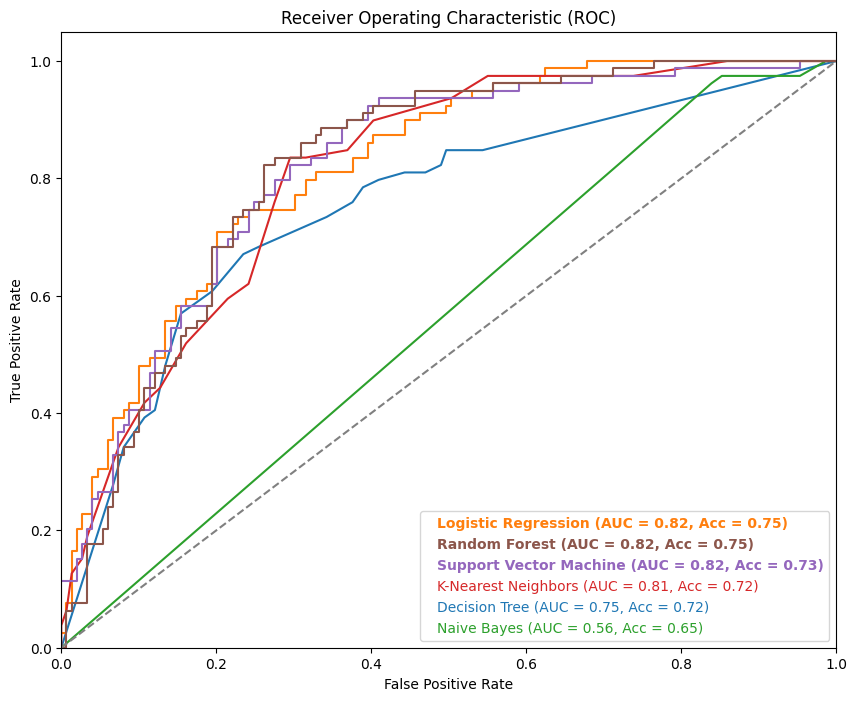

In [ ]:
# @title Evaluating script { display-mode: "form" }

from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.font_manager import FontProperties
from sklearn.metrics import brier_score_loss, recall_score, f1_score, confusion_matrix,cohen_kappa_score

classifiers = [
    ('Decision Tree', tree_classifier),
    ('Logistic Regression', logreg_classifier),
    ('Naive Bayes', nb_classifier),
    ('K-Nearest Neighbors', knn_classifier),
    ('Support Vector Machine', svm_classifier),
    ('Random Forest', rf_classifier)
]

def get_sort_indices(valori):
    indici_ordinati = [indice for indice, _ in sorted(enumerate(valori), key=lambda x: (x[1], -x[0]), reverse=True)]
    return indici_ordinati


scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(X_TEST)
normalized_test = pd.DataFrame(normalized_data, columns=X_TEST.columns)

X_train = X_train_NORM.iloc[:, :-1].values
y_train = X_train_NORM.iloc[:, -1].values
x_test = normalized_test.iloc[:, :-1].values
y_test = normalized_test.iloc[:, -1].values

roc_auc_values = []
accuracy_values = []
brier_score_values = []
specificity_values = []
recall_values = []
f1_values = []
kappa_values = []

plt.figure(figsize=(10, 8))
color_dict = {}
handles = []

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(x_test)
    y_prob = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)


    accuracy = accuracy_score(y_test, y_pred)
    roc_auc_values.append((name, roc_auc))
    accuracy_values.append((name, accuracy))

    brier_score = brier_score_loss(y_test, y_prob)
    brier_score_values.append((name, brier_score))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_values.append((name, specificity))

    recall = recall_score(y_test, y_pred)
    recall_values.append((name, recall))

    f1 = f1_score(y_test, y_pred)
    f1_values.append((name, f1))

    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_values.append((name, kappa))

    print("---------- " + name + " ----------")
    print(" Accuracy = " +  str(accuracy))
    print(" Spec = " + str(specificity))
    print(" Recall = " + str(recall))
    print(" Cohen-k = " + str(kappa))
    print(" F1 score = " + str(f1))
    print(" Brier-score = " + str(brier_score))




    line, = plt.plot(fpr, tpr, label=name)
    color_dict[name] = line.get_color()
    handles.append(line)


indexes = get_sort_indices([val for _, val in roc_auc_values])



roc_auc_values.sort(key=lambda x: x[1], reverse=True)
accuracy_values = [accuracy_values[i] for i in indexes]

ordered_classifiers = [name for name, auc_val in roc_auc_values]

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')

fontprops = FontProperties(weight='bold')
leg = plt.legend(handles=handles, loc='lower right', handlelength=0)

for text, (new_name, auc_val), (_, accuracy_val) in zip(leg.get_texts(), roc_auc_values, accuracy_values):
    text.set_text(f'{new_name} (AUC = {auc_val:.2f}, Acc = {accuracy_val:.2f})')
    text.set_color(color_dict[new_name])

ordered_legend_labels = [name for name, _ in roc_auc_values]

for i, text in enumerate(leg.get_texts()):
    if i < 3:
        text.set_fontproperties(fontprops)

plt.show()
